**Название проекта:**
Вольный луг        
        
**Описание исследования.**
        
Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
        
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
        
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
        
        

**Цель исследования.**
        
Подобрать нужных коров из предложенной выборки, соответствующих условиям: чтобы давали вкусное молоко и чтобы удой был не менее 6 000 кг в год)

**Суть исследования. Например:**

На основе имеющихся данных построить прогноз удоя и вкуса молока в предоставленной выборке 

**Задачи исследования.**

Построить модель, которая может давать прогноз вкуса молока и удоя
        
**Действия, необходимые для достижения поставленной цели.**
        
1) Обработать исходные таблицы: удалить дубликаты и т.д. 
2) Обучить на исходных данных модель 
3) Применить модель к датасету продавца

**Исходные данные.**
1.	Файл ferma_main.csv содержит данные о стаде фермера на текущий момент
2.	Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:         
3.	Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.</font>
</div>

In [1]:
import pandas as pd # импорт библиотеки pandas 
import matplotlib.pyplot as plt # импорт библиотеки pyplot 
import seaborn as sns
import numpy as np
import pickle
import joblib

import sklearn

!pip install --upgrade scikit-learn==1.4.0

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

from pathlib import Path



In [2]:
sklearn.__version__

'1.4.0'

## Загрузка данных

In [3]:
# чтение файлов с данными и сохранение в таблички

ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';') 
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

#выводим по 5 первых строк каждого датасета

In [4]:
ferma_main.head()

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет  
1          Соверин       3,54   3,079      вкусно  менее_2_лет  
2          Соверин       3,59   3,074   не вкусно  более_2_лет  
3           Айдиал        3,4   3,075   не вкусно  более_2_лет  
4          Соверин       3,73   3,073      вкусно  менее_2_лет

Столбцы на русском языке, удобнее переименовать в змеиный регистр, в данных жирности и белка стоят запятые, что не поддерживается Python

In [5]:
ferma_dad.head()        

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

Столбцы на русском языке, удобнее переименовать в змеиный регистр

In [6]:
cow_buy.head()

Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет

Столбцы на русском языке, удобнее переименовать в змеиный регистр, в данных жирности и белка стоят запятые, что осложняет задачу трансформации данных из строк в числа

In [7]:
# переименование столбцов в ferma_main

ferma_main = ferma_main.rename(columns={'Удой, кг' : 'milk_yield',
                                        'ЭКЕ (Энергетическая кормовая единица)' : 'eke', 
                                        'Сырой протеин, г' : 'protein', 
                                        'СПО (Сахаро-протеиновое соотношение)' : 'spo',
                                        'Порода' : 'breed' ,
                                        'Тип пастбища' : 'pasture_type',
                                        'порода папы_быка' : 'dad_breed', 
                                        'Жирность,%' : 'fat,%',
                                        'Белок,%' : 'protein,%',
                                        'Вкус молока' : 'taste_of_milk',
                                        'Возраст' : 'age'
                                       })
ferma_main.head()

id  milk_yield   eke  protein    spo            breed pasture_type  \
0   1        5863  14,2     1743   0,89   Вис Бик Айдиал    Равнинное   
1   2        5529  12,8     2138   0,89   Вис Бик Айдиал    Равнинные   
2   3        5810    14     1854  0,885  РефлешнСоверинг    Холмистое   
3   4        5895  12,4     2012  0,885  РефлешнСоверинг    Холмистое   
4   5        5302  12,8     1675  0,885   Вис Бик Айдиал    Равнинные   

  dad_breed fat,% protein,% taste_of_milk          age  
0    Айдиал  3,58     3,076        вкусно  более_2_лет  
1   Соверин  3,54     3,079        вкусно  менее_2_лет  
2   Соверин  3,59     3,074     не вкусно  более_2_лет  
3    Айдиал   3,4     3,075     не вкусно  более_2_лет  
4   Соверин  3,73     3,073        вкусно  менее_2_лет

In [8]:
# переименование столбцов в ferma_dad

ferma_dad = ferma_dad.rename(columns={'Имя Папы' : 'dad_name'})
ferma_dad.head()

id  dad_name
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

In [9]:
# переименование столбцов в cow_buy

cow_buy = cow_buy.rename(columns={'Порода' : 'breed' ,
                                  'Тип пастбища' : 'pasture_type',
                                  'порода папы_быка' : 'dad_breed',
                                  'Имя_папы' : 'dad_name',
                                  'Текущая_жирность,%' : 'current_fat,%',
                                  'Текущий_уровень_белок,%' : 'current_protein,%',
                                  'Возраст' : 'age'})
cow_buy.head()

breed pasture_type dad_breed  dad_name current_fat,%  \
0   Вис Бик Айдиал    холмистое    Айдиал  Геркулес          3,58   
1   Вис Бик Айдиал    равнинное   Соверин    Буйный          3,54   
2  РефлешнСоверинг    равнинное   Соверин     Барин          3,59   
3  РефлешнСоверинг    холмистое    Айдиал    Буйный           3,4   
4  РефлешнСоверинг    равнинное    Айдиал    Буйный          3,64   

  current_protein,%          age  
0             3,076  более_2_лет  
1             3,081  менее_2_лет  
2             3,074  более_2_лет  
3             3,061  более_2_лет  
4             3,074  более_2_лет

In [10]:
#смотрим информацию про датасет ferma_main

ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             634 non-null    int64 
 1   milk_yield     634 non-null    int64 
 2   eke            634 non-null    object
 3   protein        634 non-null    int64 
 4   spo            634 non-null    object
 5   breed          634 non-null    object
 6   pasture_type   634 non-null    object
 7   dad_breed      634 non-null    object
 8   fat,%          634 non-null    object
 9   protein,%      634 non-null    object
 10  taste_of_milk  634 non-null    object
 11  age            634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


жирность и белок стоят в текстовом формате, заменяем их на числовой. Всего 634 строки в датасете

In [11]:
#меняем тип данных в object
#меняем точку на запятую

for column in ['spo', 'eke', 'fat,%', 'protein,%']:
    ferma_main[column] = ferma_main[column].str.replace(',', '.')

ferma_main.head()

id  milk_yield   eke  protein    spo            breed pasture_type  \
0   1        5863  14.2     1743   0.89   Вис Бик Айдиал    Равнинное   
1   2        5529  12.8     2138   0.89   Вис Бик Айдиал    Равнинные   
2   3        5810    14     1854  0.885  РефлешнСоверинг    Холмистое   
3   4        5895  12.4     2012  0.885  РефлешнСоверинг    Холмистое   
4   5        5302  12.8     1675  0.885   Вис Бик Айдиал    Равнинные   

  dad_breed fat,% protein,% taste_of_milk          age  
0    Айдиал  3.58     3.076        вкусно  более_2_лет  
1   Соверин  3.54     3.079        вкусно  менее_2_лет  
2   Соверин  3.59     3.074     не вкусно  более_2_лет  
3    Айдиал   3.4     3.075     не вкусно  более_2_лет  
4   Соверин  3.73     3.073        вкусно  менее_2_лет

In [12]:
#меняем тип данных с object на float64
ferma_main = ferma_main.astype({'eke' : 'float64', 'spo' : 'float64', 'fat,%' : 'float64', 'protein,%' : 'float64' })
                             
ferma_main.info()                            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             634 non-null    int64  
 1   milk_yield     634 non-null    int64  
 2   eke            634 non-null    float64
 3   protein        634 non-null    int64  
 4   spo            634 non-null    float64
 5   breed          634 non-null    object 
 6   pasture_type   634 non-null    object 
 7   dad_breed      634 non-null    object 
 8   fat,%          634 non-null    float64
 9   protein,%      634 non-null    float64
 10  taste_of_milk  634 non-null    object 
 11  age            634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [13]:
#смотрим информацию про датасет ferma_dad

ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   dad_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [14]:
#смотрим информацию про датасет cow_buy

cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   breed              20 non-null     object
 1   pasture_type       20 non-null     object
 2   dad_breed          20 non-null     object
 3   dad_name           20 non-null     object
 4   current_fat,%      20 non-null     object
 5   current_protein,%  20 non-null     object
 6   age                20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


жирность и белок стоят в текстовом формате, заменяем их на числовой

In [15]:
#меняем тип данных в object
#меняем точку на запятую

for column in ['current_fat,%', 'current_protein,%']:
    cow_buy[column] = cow_buy[column].str.replace(',', '.')

cow_buy.head()

breed pasture_type dad_breed  dad_name current_fat,%  \
0   Вис Бик Айдиал    холмистое    Айдиал  Геркулес          3.58   
1   Вис Бик Айдиал    равнинное   Соверин    Буйный          3.54   
2  РефлешнСоверинг    равнинное   Соверин     Барин          3.59   
3  РефлешнСоверинг    холмистое    Айдиал    Буйный           3.4   
4  РефлешнСоверинг    равнинное    Айдиал    Буйный          3.64   

  current_protein,%          age  
0             3.076  более_2_лет  
1             3.081  менее_2_лет  
2             3.074  более_2_лет  
3             3.061  более_2_лет  
4             3.074  более_2_лет

In [16]:
#меняем тип данных с object на float64
cow_buy = cow_buy.astype({'current_fat,%' : 'float64', 'current_protein,%' : 'float64' })
                             
cow_buy.info()                            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   breed              20 non-null     object 
 1   pasture_type       20 non-null     object 
 2   dad_breed          20 non-null     object 
 3   dad_name           20 non-null     object 
 4   current_fat,%      20 non-null     float64
 5   current_protein,%  20 non-null     float64
 6   age                20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


В первом этапе мы заменили названия столбцов на змеиный регистр, привели строчные значения к числовым. Также можно привести к числову формату категорриональные значения (порода, возраст, тип пастбища и т.д.), но на данных этапах удобнее работать с текстовыми значениями 

##  Предобработка данных

Проверим данные на наличие пропусков и дубликатов. Узнаем, корректны ли типы данных у каждого признака. 

In [17]:
# смотрим количество пропусков в ferma_main

ferma_main.isna().sum()

id               0
milk_yield       0
eke              0
protein          0
spo              0
breed            0
pasture_type     0
dad_breed        0
fat,%            0
protein,%        0
taste_of_milk    0
age              0
dtype: int64

Пропусков нет

In [18]:
# смотрим количество пропусков в ferma_dad

ferma_dad.isna().sum()

id          0
dad_name    0
dtype: int64

Пропусков нет

In [19]:
# смотрим количество пропусков в cow_buy

cow_buy.isna().sum()

breed                0
pasture_type         0
dad_breed            0
dad_name             0
current_fat,%        0
current_protein,%    0
age                  0
dtype: int64

пропусков нет

In [20]:
#выведем на экран количество строк-дубликатов в ferma_main

ferma_main.duplicated().sum()

5

In [21]:
#удаляем строки-дубликаты в ferma_main

ferma_main = ferma_main.drop_duplicates()

в датасете ferma_main было обнаружено 5 строк-дубликатов. Дубликаты удалили

In [22]:
#выведем на экран количество строк-дубликатов в ferma_dad

ferma_dad.duplicated().sum()

0

в датасете ferma_dad было дубликатов не обнаружено

In [23]:
#выведем на экран количество строк-дубликатов в cow_buy
 
cow_buy.duplicated().sum()

4

в датасете cow_buy было обнаружено 4 строки-дубликаты. Дубликаты не удалили

### Выявляем неявные дубликаты

In [24]:
# Получение уникальных значений для каждого столбца в ferma_main
columns_to_check = ['breed', 'pasture_type', 'dad_breed', 'taste_of_milk', 'age']
unique_values = {col: ferma_main[col].unique() for col in columns_to_check}

print("Уникальные значения в каждом из столбцов:")
for col, values in unique_values.items():
    print(f"{col}: {values}")

Уникальные значения в каждом из столбцов:
breed: ['Вис Бик Айдиал' 'РефлешнСоверинг']
pasture_type: ['Равнинное' 'Равнинные' 'Холмистое']
dad_breed: ['Айдиал' 'Соверин' 'Айдиалл']
taste_of_milk: ['вкусно' 'не вкусно']
age: ['более_2_лет' 'менее_2_лет']


In [25]:
#удаляем неявные дубликаты

ferma_main['pasture_type'] = ferma_main['pasture_type'].str.replace('Равнинные', 'Равнинное')
ferma_main['dad_breed'] = ferma_main['dad_breed'].str.replace('Айдиалл', 'Айдиал')

In [26]:
# Получение уникальных значений для каждого столбца в ferma_dad
unique_values = ferma_dad['dad_name'].unique() 

unique_values

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [27]:
# Получение уникальных значений для каждого столбца в cow_buy
columns_to_check = ['breed', 'pasture_type', 'dad_breed', 'dad_name', 'age']
unique_values = {col: cow_buy[col].unique() for col in columns_to_check}


print("Уникальные значения в каждом из столбцов:")
for col, values in unique_values.items():
    print(f"{col}: {values}")


Уникальные значения в каждом из столбцов:
breed: ['Вис Бик Айдиал' 'РефлешнСоверинг']
pasture_type: ['холмистое' 'равнинное']
dad_breed: ['Айдиал' 'Соверин']
dad_name: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
age: ['более_2_лет' 'менее_2_лет']


Видимо, человеческий фактор при наборе данных - слова написаны различными вариантами. Данный недочет исправили

## Исследовательский анализ данных

### Датасет ferma_main

Признаки в датасете ferma_main.csv можно разделить на группы.

o	Характеристики коровы: id, Порода, порода папы_быка, Возраст.

o	Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).

o	Характеристика пастбища: Тип пастбища.

o	Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

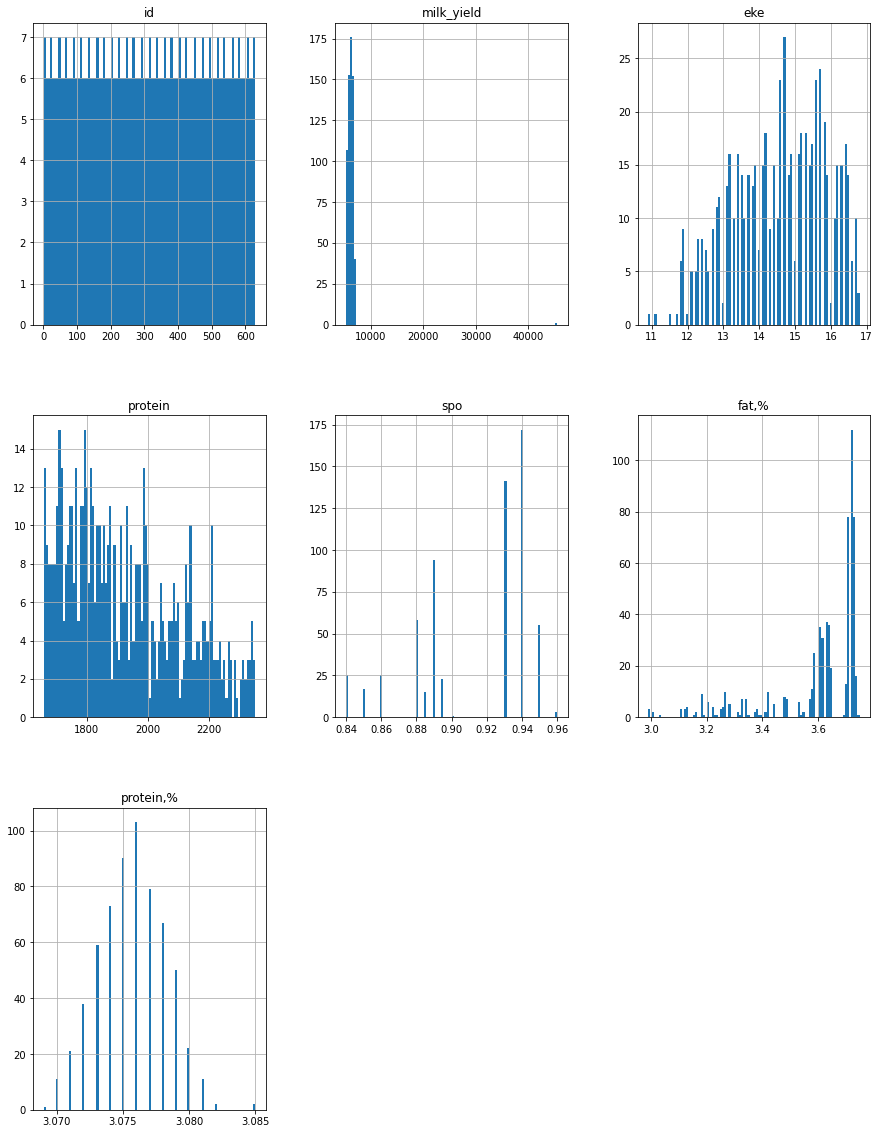

In [28]:
# Построение гистограмм для всех числовых столбцов таблицы
ferma_main.hist(bins=100, figsize=(15, 20))
plt.show()

**Характеристики коровы:**

In [29]:
#смотрим частоту встречаемости породы и создаем таблицу cow_breed
 
cow_breed_frequency = ferma_main['breed'].value_counts()

#смотрим соотношение в процентах 
cow_breed_percentage = ferma_main['breed'].value_counts()/len(ferma_main) * 100

#создаем общую таблицу

cow_breed = pd.concat([cow_breed_frequency,cow_breed_percentage], axis=1).round(2)
cow_breed.columns = ['quantity','percentage']
cow_breed

quantity  percentage
Вис Бик Айдиал        373        59.3
РефлешнСоверинг       256        40.7

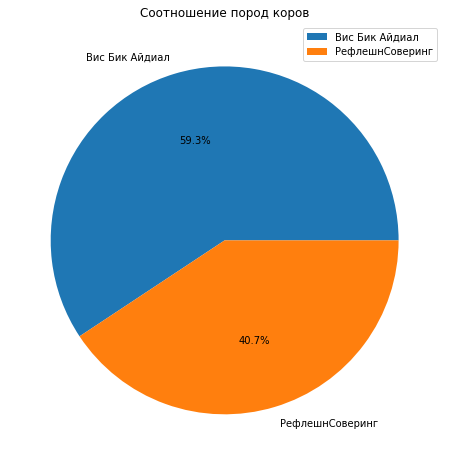

In [30]:
#строим круговую диаграмму

cow_breed.plot(y='percentage', kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Соотношение пород коров')
plt.ylabel('')  # Убираем ось y для красоты
plt.show()

Породы распределены более - менее равномерно.Но Вис Бик Айдиал лидирует - 59% против 41% РефлешнСоверинг	

In [31]:
#смотрим частоту встречаемости породы папы быка и создаем таблицу cow_breed_dad
 
cow_breed_dad_frequency = ferma_main['dad_breed'].value_counts()

#смотрим соотношение в процентах 
cow_breed_dad_percentage = ferma_main['dad_breed'].value_counts()/len(ferma_main) * 100

#создаем общую таблицу

cow_breed_dad = pd.concat([cow_breed_dad_frequency,cow_breed_dad_percentage], axis=1).round(2)
cow_breed_dad.columns = ['quantity','percentage']
cow_breed_dad

quantity  percentage
Айдиал        318       50.56
Соверин       311       49.44

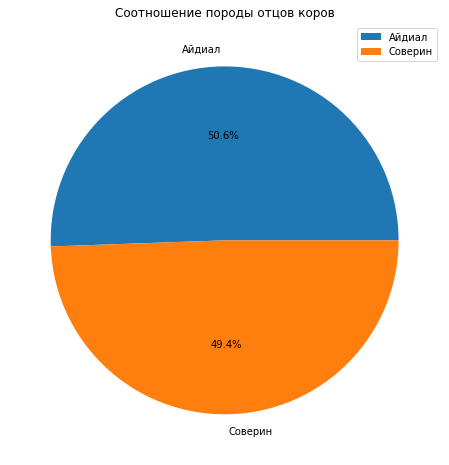

In [32]:
#строим круговую диаграмму

cow_breed_dad.plot(y='percentage', kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Соотношение породы отцов коров')
plt.ylabel('')  # Убираем ось y для красоты
plt.show()

Породы пап коров распределены равномерно

In [33]:
#смотрим частоту встречаемости возраста и создаем таблицу cow_age
 
cow_age_frequency = ferma_main['age'].value_counts()

#смотрим соотношение в процентах 
cow_age_percentage = ferma_main['age'].value_counts()/len(ferma_main) * 100

#создаем общую таблицу

cow_age = pd.concat([cow_age_frequency,cow_age_percentage], axis=1).round(2)
cow_age.columns = ['quantity','percentage']
cow_age

quantity  percentage
более_2_лет       519       82.51
менее_2_лет       110       17.49

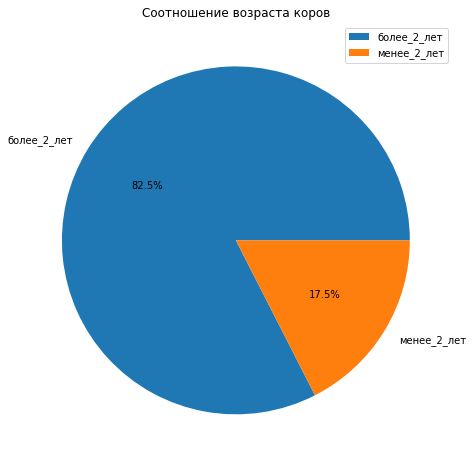

In [34]:
#строим круговую диаграмму

cow_age.plot(y='percentage', kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Соотношение возраста коров')
plt.ylabel('')  # Убираем ось y для красоты
plt.show()

В основном на ферме содержатся коровы старше 2-х лет - 81.5%

**Характеристики корма:**

Text(0, 0.5, 'Количество')

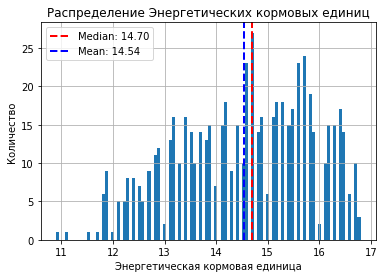

In [35]:
# Посмотрим данные Энергетических кормовых единиц на гистограмме 

ferma_main['eke'].hist(bins=100)
median = ferma_main['eke'].median()
mean = ferma_main['eke'].mean()

plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.legend()
plt.title('Распределение Энергетических кормовых единиц')
plt.xlabel('Энергетическая кормовая единица')
plt.ylabel('Количество')

<AxesSubplot:>

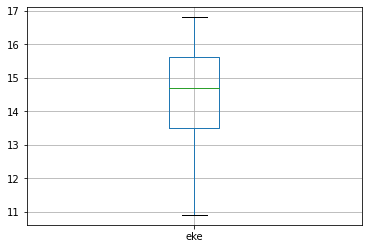

In [36]:
ferma_main.boxplot('eke') 

У гистограмы наблюдается три пика на значениях 14.5, 15.7, 16.4

Text(0, 0.5, 'Количество')

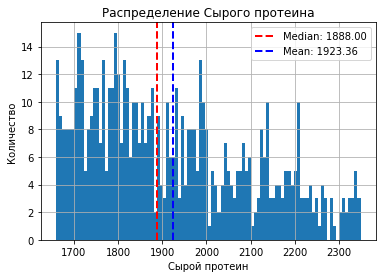

In [37]:
# Посмотрим данные "Сырой протеин" на гистограмме 

ferma_main['protein'].hist(bins=100)

median = ferma_main['protein'].median()
mean = ferma_main['protein'].mean()

plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.legend()


plt.title('Распределение Сырого протеина')
plt.xlabel('Сырой протеин')
plt.ylabel('Количество')

<AxesSubplot:>

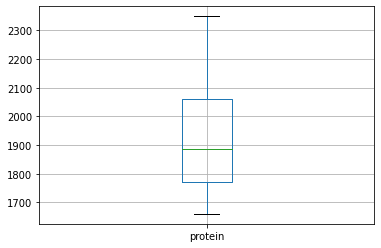

In [38]:
ferma_main.boxplot('protein')

Text(0, 0.5, 'Количество')

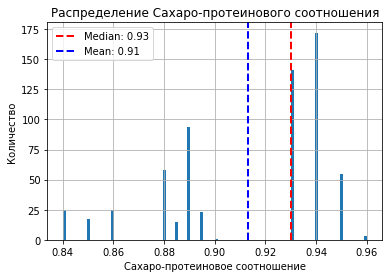

In [39]:
# Посмотрим данные "Сахаро-протеиновое соотношение" на гистограмме 

ferma_main['spo'].hist(bins=100)
median = ferma_main['spo'].median()
mean = ferma_main['spo'].mean()

plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.legend()


plt.title('Распределение Сахаро-протеинового соотношения')
plt.xlabel('Сахаро-протеиновое соотношение')
plt.ylabel('Количество')

На графике видны три категории СПО - 0.84-0.86; 0.88-0.91; 0.93-0.96

**Характеристика пастбища:**

In [40]:
#смотрим частоту встречаемости типов пастбищ и создаем таблицу cow_pasture_type
 
cow_pasture_type_frequency = ferma_main['pasture_type'].value_counts()

#смотрим соотношение в процентах 
cow_pasture_type_percentage = ferma_main['pasture_type'].value_counts()/len(ferma_main) * 100

#создаем общую таблицу

cow_pasture_type = pd.concat([cow_pasture_type_frequency,cow_pasture_type_percentage], axis=1).round(2)
cow_pasture_type.columns = ['quantity','percentage']
cow_pasture_type

quantity  percentage
Холмистое       351        55.8
Равнинное       278        44.2

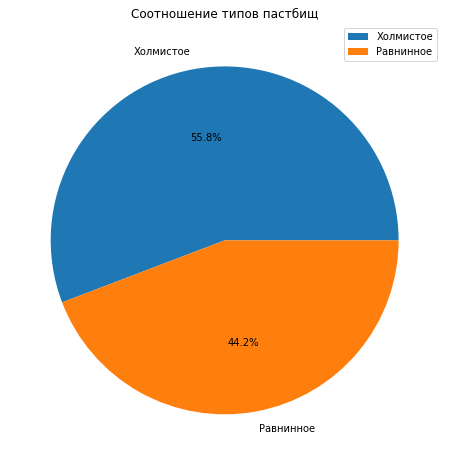

In [41]:
#строим круговую диаграмму

cow_pasture_type.plot(y='percentage', kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Соотношение типов пастбищ')
plt.ylabel('')  # Убираем ось y для красоты
plt.show()

**Характеристики молока:**

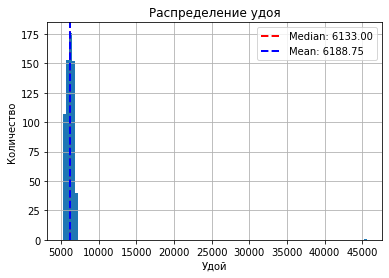

In [42]:
# Посмотрим данные Удоя на гистограмме 

ferma_main['milk_yield'].hist(bins=100)
# Вычисление медианы и среднего значения
median = ferma_main['milk_yield'].median()
mean = ferma_main['milk_yield'].mean()

plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.title('Распределение удоя')
plt.xlabel('Удой')
plt.ylabel('Количество')
plt.legend()

<AxesSubplot:>

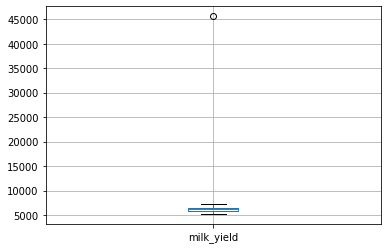

In [43]:
ferma_main.boxplot('milk_yield') 

Text(0, 0.5, 'Количество')

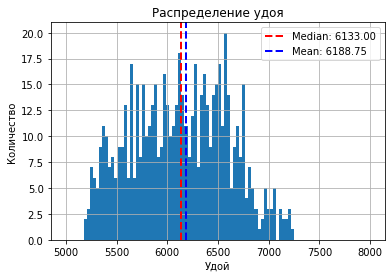

In [44]:
# Приблизим значения от 5000 до 8000

ferma_main['milk_yield'].hist(bins=100,range = (5000, 8000))

median = ferma_main['milk_yield'].median()
mean = ferma_main['milk_yield'].mean()

plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.legend()

plt.title('Распределение удоя')
plt.xlabel('Удой')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

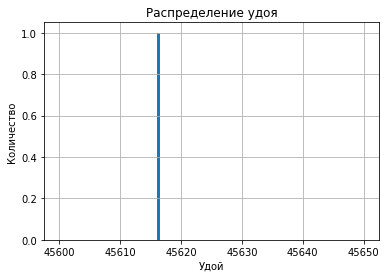

In [45]:
# Приблизим значения от 45600 до 45650

ferma_main['milk_yield'].hist(bins=100, range = (45600, 45650))
plt.title('Распределение удоя')
plt.xlabel('Удой')
plt.ylabel('Количество')

Есть аномальный выброс на 45 615. Распределение правильное, но максимальное значение смещено вправо от среднего и медианного (примерно 6560 при средней и медиане около 6110)

In [46]:
# Избавимся от аномального выброса
ferma_main = ferma_main[ferma_main['milk_yield'] <= 8000]


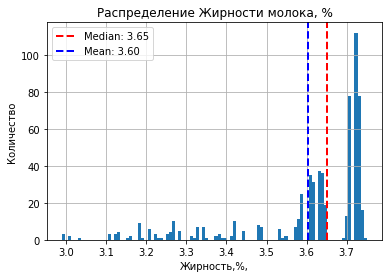

In [47]:
# Посмотрим данные Жирности,%, на гистограмме 

ferma_main['fat,%'].hist(bins=100)

# Вычисление медианы и среднего значения
median = ferma_main['fat,%'].median()
mean = ferma_main['fat,%'].mean()

plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.title('Распределение Жирности молока, %')
plt.xlabel('Жирность,%,')
plt.ylabel('Количество')
plt.legend()

<AxesSubplot:>

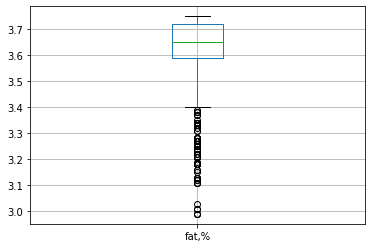

In [48]:
ferma_main.boxplot('fat,%') 

График сдвинут на значения 3.6, 3.7. Значения ниже 3.4 считаются выбросами 

Text(0, 0.5, 'Количество')

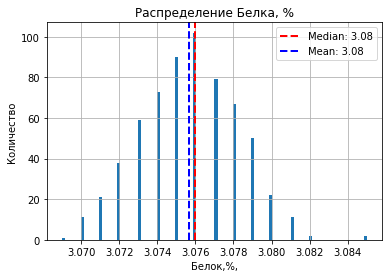

In [49]:
# Посмотрим данные Белка,%, на гистограмме 

ferma_main['protein,%'].hist(bins=100)
median = ferma_main['protein,%'].median()
mean = ferma_main['protein,%'].mean()

plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.legend()
plt.title('Распределение Белка, %')
plt.xlabel('Белок,%,')
plt.ylabel('Количество')

<AxesSubplot:>

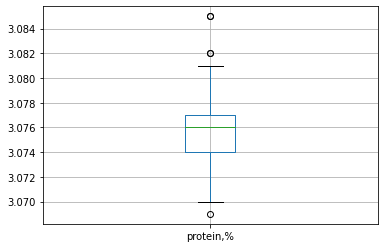

In [50]:
ferma_main.boxplot('protein,%')

Распределение белка нормальное, есть аномальные выбросы на 3.069, 3.082, 3.084

In [51]:
#смотрим cоотношение вкуса молока и создаем таблицу cow_pasture_type
 
cow_taste_of_milk_frequency = ferma_main['taste_of_milk'].value_counts()

#смотрим соотношение в процентах 
cow_taste_of_milk_percentage = ferma_main['taste_of_milk'].value_counts()/len(ferma_main) * 100

#создаем общую таблицу

cow_taste_of_milk = pd.concat([cow_taste_of_milk_frequency,cow_taste_of_milk_percentage], axis=1).round(2)
cow_taste_of_milk.columns = ['quantity','percentage']
cow_taste_of_milk

quantity  percentage
вкусно          370       58.92
не вкусно       258       41.08

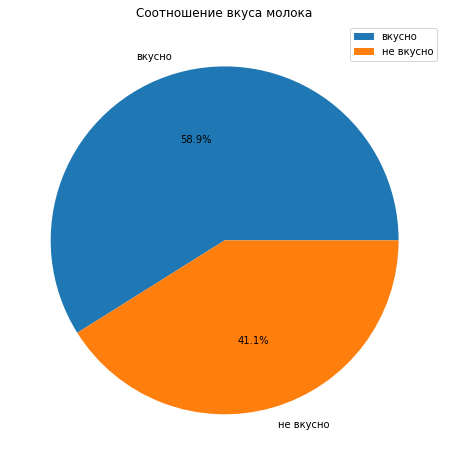

In [52]:
#строим круговую диаграмму

cow_taste_of_milk.plot(y='percentage', kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Соотношение вкуса молока')
plt.ylabel('')  # Убираем ось y для красоты
plt.show()

Молоко чаще вкусное, чем невкусное

### Датасет ferma_dad

In [53]:
#смотрим соотношение вкуса молока и создаем таблицу cow_dad_name
 
cow_dad_name_frequency = ferma_dad['dad_name'].value_counts()

#смотрим соотношение в процентах 
cow_dad_name_percentage = ferma_dad['dad_name'].value_counts()/len(ferma_dad) * 100

#создаем общую таблицу

cow_dad_name = pd.concat([cow_dad_name_frequency,cow_dad_name_percentage], axis=1).round(2)
cow_dad_name.columns = ['quantity','percentage']
cow_dad_name

quantity  percentage
Барин          240       38.16
Буйный         215       34.18
Соловчик       110       17.49
Геркулес        64       10.17

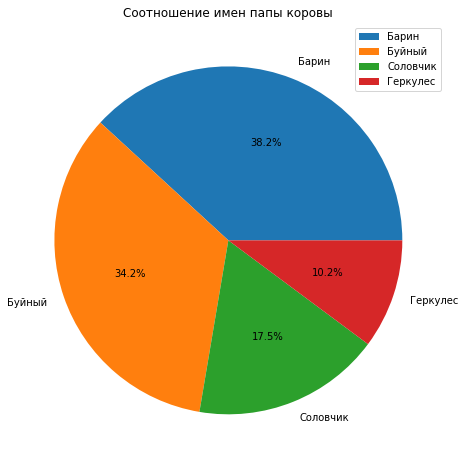

In [54]:
#строим круговую диаграмму

cow_dad_name.plot(y='percentage', kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Соотношение имен папы коровы')
plt.ylabel('')  # Убираем ось y для красоты
plt.show()

### Датасет cow_buy

Признаки в датасете можно разделить на группы.

o	Характеристики коровы: id, Порода, порода папы_быка, Возраст

o	Характеристика пастбища: Тип пастбища.

o	Характеристики молока: Текущая_Жирность,%, Текущий_уровень_белок,% 

**Характеристики коровы:**

In [55]:
#смотрим частоту встречаемости породы и создаем таблицу cow_breed
 
cow_buy_breed_frequency = cow_buy['breed'].value_counts()

#смотрим соотношение в процентах 
cow_buy_breed_percentage = cow_buy['breed'].value_counts()/len(cow_buy) * 100

#создаем общую таблицу

cow_buy_breed = pd.concat([cow_buy_breed_frequency,cow_buy_breed_percentage], axis=1).round(2)
cow_buy_breed.columns = ['quantity','percentage']
cow_buy_breed

quantity  percentage
РефлешнСоверинг        11        55.0
Вис Бик Айдиал          9        45.0

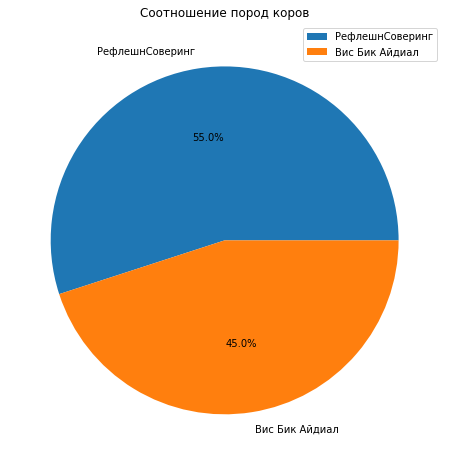

In [56]:
#строим круговую диаграмму

cow_buy_breed.plot(y='percentage', kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Соотношение пород коров')
plt.ylabel('')  # Убираем ось y для красоты
plt.show()

Породы распределены равномерно

In [57]:
#смотрим частоту встречаемости породы папы быка и создаем таблицу cow_buy_breed_dad
 
cow_buy_breed_dad_frequency = cow_buy['dad_breed'].value_counts()

#смотрим соотношение в процентах 
cow_buy_breed_dad_percentage = cow_buy['dad_breed'].value_counts()/len(cow_buy) * 100

#создаем общую таблицу

cow_buy_breed_dad = pd.concat([cow_buy_breed_dad_frequency,cow_buy_breed_dad_percentage], axis=1).round(2)
cow_buy_breed_dad.columns = ['quantity','percentage']
cow_buy_breed_dad

quantity  percentage
Соверин        12        60.0
Айдиал          8        40.0

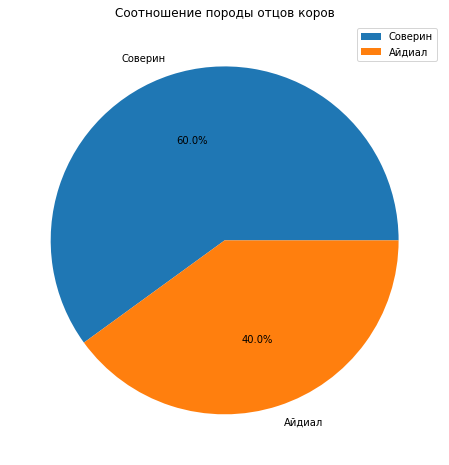

In [58]:
#строим круговую диаграмму

cow_buy_breed_dad.plot(y='percentage', kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Соотношение породы отцов коров')
plt.ylabel('')  # Убираем ось y для красоты
plt.show()

Среди пород производителей преобладает порода Соверин

In [59]:
#смотрим частоту встречаемости возраста и создаем таблицу cow_buy_age
 
cow_buy_age_frequency = cow_buy['age'].value_counts()

#смотрим соотношение в процентах 
cow_buy_age_percentage = cow_buy['age'].value_counts()/len(cow_buy) * 100

#создаем общую таблицу

cow_buy_age = pd.concat([cow_buy_age_frequency,cow_buy_age_percentage], axis=1).round(2)
cow_buy_age.columns = ['quantity','percentage']
cow_buy_age

quantity  percentage
более_2_лет        15        75.0
менее_2_лет         5        25.0

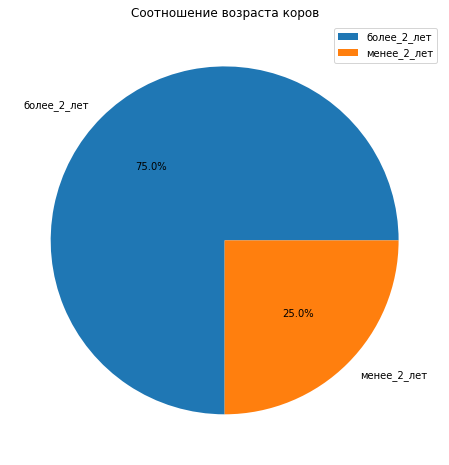

In [60]:
#строим круговую диаграмму

cow_buy_age.plot(y='percentage', kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Соотношение возраста коров')
plt.ylabel('')  # Убираем ось y для красоты
plt.show()

В основном коровам больше 2-х лет

**Характеристика пастбища:**

In [61]:
#смотрим частоту встречаемости типов пастбищ и создаем таблицу cow_buy_pasture_type
 
cow_buy_pasture_type_frequency = cow_buy['pasture_type'].value_counts()

#смотрим соотношение в процентах 
cow_buy_pasture_type_percentage = cow_buy['pasture_type'].value_counts()/len(cow_buy) * 100

#создаем общую таблицу

cow_buy_pasture_type = pd.concat([cow_buy_pasture_type_frequency,cow_buy_pasture_type_percentage], axis=1).round(2)
cow_buy_pasture_type.columns = ['quantity','percentage']
cow_buy_pasture_type

quantity  percentage
равнинное        11        55.0
холмистое         9        45.0

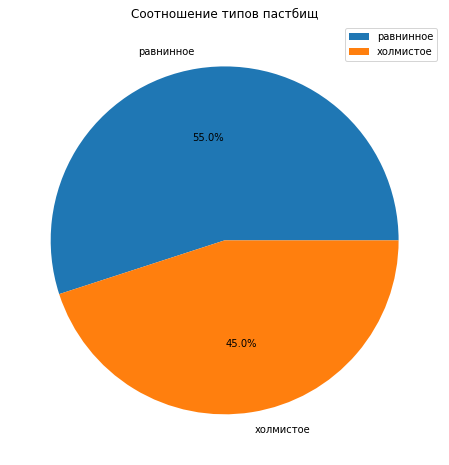

In [62]:
#строим круговую диаграмму

cow_buy_pasture_type.plot(y='percentage', kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Соотношение типов пастбищ')
plt.ylabel('')  # Убираем ось y для красоты
plt.show()

**Характеристики молока:**

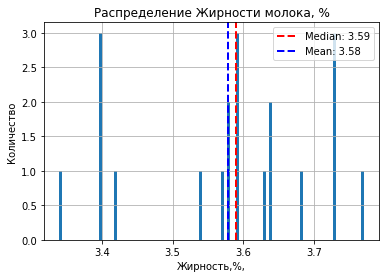

In [63]:
# Посмотрим данные Текущей Жирности,%, на гистограмме 

cow_buy['current_fat,%'].hist(bins=100)

# Вычисление медианы и среднего значения
median = cow_buy['current_fat,%'].median()
mean = cow_buy['current_fat,%'].mean()

plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.title('Распределение Жирности молока, %')
plt.xlabel('Жирность,%,')
plt.ylabel('Количество')
plt.legend()

<AxesSubplot:>

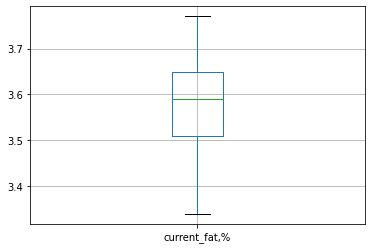

In [64]:
cow_buy.boxplot('current_fat,%') 

Видим максимумы значений на 3.4, 3.73

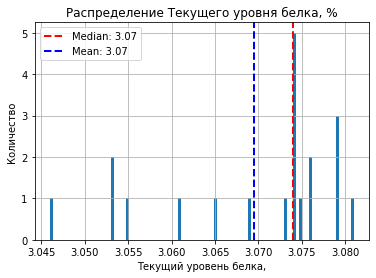

In [65]:
# Посмотрим данные Текущего _уровня_белка,%, на гистограмме 

cow_buy['current_protein,%'].hist(bins=100)

# Вычисление медианы и среднего значения
median = cow_buy['current_protein,%'].median()
mean = cow_buy['current_protein,%'].mean()

plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mean, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.title('Распределение Текущего уровня белка, %')
plt.xlabel('Текущий уровень белка,')
plt.ylabel('Количество')
plt.legend()

<AxesSubplot:>

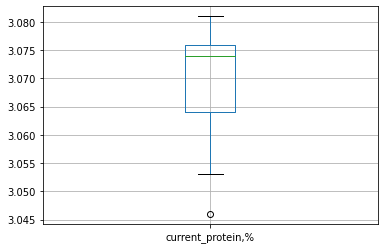

In [66]:
cow_buy.boxplot('current_protein,%') 

## Корреляционный анализ

**Cмотрим взаимосвязи для Удоя**

In [67]:
ferma_main['milk_yield'].corr(ferma_main['eke'])

0.7650977877344268

In [68]:
# Коэффициент корреляции Спирмена
spearman_corr = ferma_main['milk_yield'].corr(ferma_main['eke'], method='spearman')
print(f"Коэффициент корреляции Спирмена: {spearman_corr}")

# Коэффициент корреляции Кендалла
kendall_corr = ferma_main['milk_yield'].corr(ferma_main['eke'], method='kendall')
print(f"Коэффициент корреляции Кендалла: {kendall_corr}")

Коэффициент корреляции Спирмена: 0.7651443116006692
Коэффициент корреляции Кендалла: 0.5666408550376045


Text(0.5, 1.0, 'Диаграмма рассеяния между удоем и энергетической кормовой единицей')

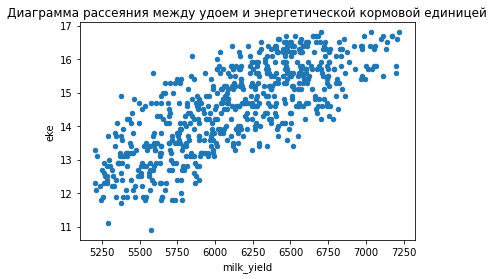

In [69]:
ferma_main.plot(x='milk_yield', y='eke', kind='scatter') 
plt.title('Диаграмма рассеяния между удоем и энергетической кормовой единицей')

In [70]:
ferma_main['milk_yield'].corr(ferma_main['spo'])

0.8063389252912262

In [71]:
# Коэффициент корреляции Спирмена
spearman_corr = ferma_main['milk_yield'].corr(ferma_main['spo'], method='spearman')
print(f"Коэффициент корреляции Спирмена: {spearman_corr}")

# Коэффициент корреляции Кендалла
kendall_corr = ferma_main['milk_yield'].corr(ferma_main['spo'], method='kendall')
print(f"Коэффициент корреляции Кендалла: {kendall_corr}")

Коэффициент корреляции Спирмена: 0.787904090851949
Коэффициент корреляции Кендалла: 0.5955101743875045


Text(0.5, 1.0, 'Диаграмма рассеяния между удоем и сахаро-протеиновым соотношением')

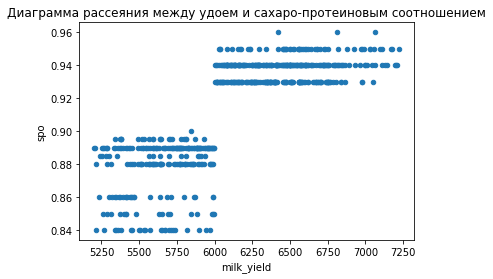

In [72]:
ferma_main.plot(x='milk_yield', y='spo', kind='scatter') 
plt.title('Диаграмма рассеяния между удоем и сахаро-протеиновым соотношением')

In [73]:
ferma_main['milk_yield'].corr(ferma_main['fat,%'])

0.6009018484316156

In [74]:
# Коэффициент корреляции Спирмена
spearman_corr = ferma_main['milk_yield'].corr(ferma_main['fat,%'], method='spearman')
print(f"Коэффициент корреляции Спирмена: {spearman_corr}")

# Коэффициент корреляции Кендалла
kendall_corr = ferma_main['milk_yield'].corr(ferma_main['fat,%'], method='kendall')
print(f"Коэффициент корреляции Кендалла: {kendall_corr}")

Коэффициент корреляции Спирмена: 0.688505794761783
Коэффициент корреляции Кендалла: 0.4941395491568725


Text(0.5, 1.0, 'Диаграмма рассеяния между удоем и жирностью')

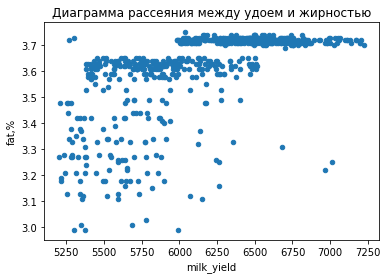

In [75]:
ferma_main.plot(x='milk_yield', y='fat,%', kind='scatter') 
plt.title('Диаграмма рассеяния между удоем и жирностью')

In [76]:
ferma_main['milk_yield'].corr(ferma_main['protein,%'])

0.002965710114691232

In [77]:
# Коэффициент корреляции Спирмена
spearman_corr = ferma_main['milk_yield'].corr(ferma_main['protein,%'], method='spearman')
print(f"Коэффициент корреляции Спирмена: {spearman_corr}")

# Коэффициент корреляции Кендалла
kendall_corr = ferma_main['milk_yield'].corr(ferma_main['protein,%'], method='kendall')
print(f"Коэффициент корреляции Кендалла: {kendall_corr}")

Коэффициент корреляции Спирмена: -0.005700881383962722
Коэффициент корреляции Кендалла: -0.004750299433091765


Text(0.5, 1.0, 'Диаграмма рассеяния между удоем и белком')

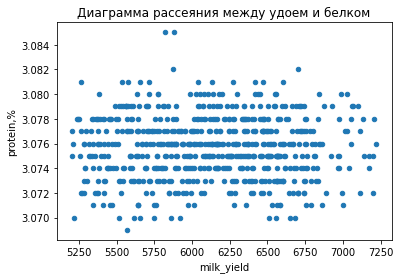

In [78]:
ferma_main.plot(x='milk_yield', y='protein,%', kind='scatter') 
plt.title('Диаграмма рассеяния между удоем и белком')

Text(0.5, 1.0, 'Взаимосвязь удоя и возраста')

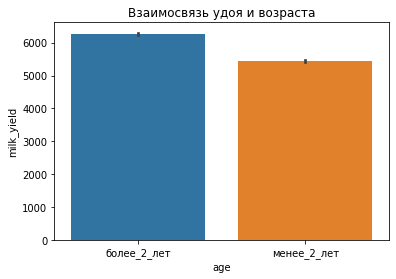

In [79]:
# взаимосвязь удоя и возраста
sns.barplot(x='age', y='milk_yield', data=ferma_main)
plt.title('Взаимосвязь удоя и возраста')

Text(0.5, 1.0, 'Взаимосвязь удоя и породы')

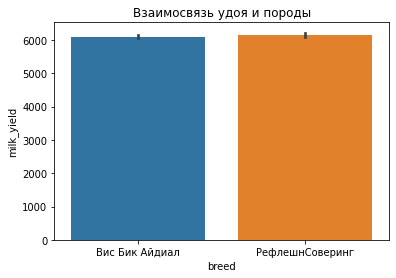

In [80]:
# взаимосвязь удоя и породы
sns.barplot(x='breed', y='milk_yield', data=ferma_main)
plt.title('Взаимосвязь удоя и породы')

Text(0.5, 1.0, 'Взаимосвязь удоя и типа пастбищ')

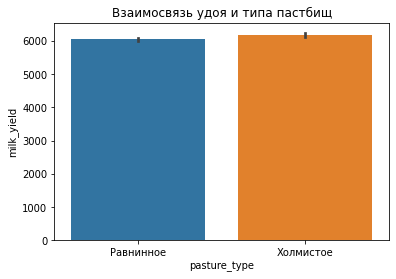

In [81]:
# взаимосвязь удоя и типа пастбищ
sns.barplot(x='pasture_type', y='milk_yield', data=ferma_main)
plt.title('Взаимосвязь удоя и типа пастбищ')

Text(0.5, 1.0, 'Взаимосвязь удоя и  породы папы_быка')

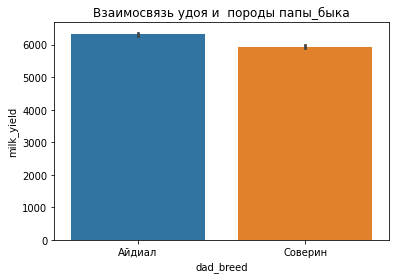

In [82]:
# взаимосвязь удоя и  породы папы_быка
sns.barplot(x='dad_breed', y='milk_yield', data=ferma_main)
plt.title('Взаимосвязь удоя и  породы папы_быка')

Text(0.5, 1.0, 'Взаимосвязь удоя и вкуса молока')

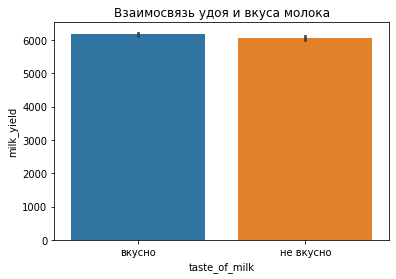

In [83]:
# взаимосвязь удоя и вкуса молока
sns.barplot(x='taste_of_milk', y='milk_yield', data=ferma_main)
plt.title('Взаимосвязь удоя и вкуса молока')

**Cмотрим взаимосвязи для Энергетической кормовой единицы**

In [84]:
ferma_main['eke'].corr(ferma_main['protein'])

0.38787487983889324

In [85]:
# Коэффициент корреляции Спирмена
spearman_corr = ferma_main['eke'].corr(ferma_main['protein'], method='spearman')
print(f"Коэффициент корреляции Спирмена: {spearman_corr}")

# Коэффициент корреляции Кендалла
kendall_corr = ferma_main['eke'].corr(ferma_main['protein'], method='kendall')
print(f"Коэффициент корреляции Кендалла: {kendall_corr}")

Коэффициент корреляции Спирмена: 0.3847469775069655
Коэффициент корреляции Кендалла: 0.26544881946963506


Text(0.5, 1.0, 'Диаграмма рассеяния между Энергетической кормовой единицей и уровнем протеина')

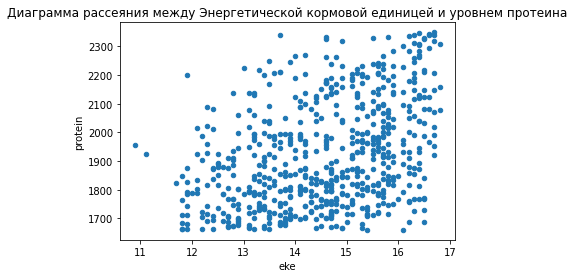

In [86]:
ferma_main.plot(x='eke', y='protein', kind='scatter') 
plt.title('Диаграмма рассеяния между Энергетической кормовой единицей и уровнем протеина')


Умеренная положительная связь между Энергетической кормовой единицы и уровнем протеина


In [87]:
ferma_main['eke'].corr(ferma_main['spo'])

0.7490071781056784

In [88]:
# Коэффициент корреляции Спирмена
spearman_corr = ferma_main['eke'].corr(ferma_main['spo'], method='spearman')
print(f"Коэффициент корреляции Спирмена: {spearman_corr}")

# Коэффициент корреляции Кендалла
kendall_corr = ferma_main['eke'].corr(ferma_main['spo'], method='kendall')
print(f"Коэффициент корреляции Кендалла: {kendall_corr}")

Коэффициент корреляции Спирмена: 0.7419617884362985
Коэффициент корреляции Кендалла: 0.5788575286517547


Text(0.5, 1.0, 'Диаграмма рассеяния между Энергетической кормовой единицей и уровнем Сахаро-протеинового соотношения')

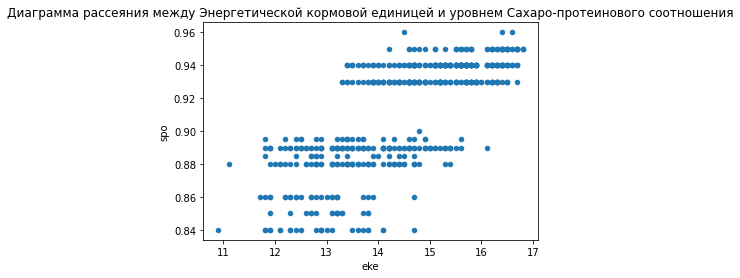

In [89]:
ferma_main.plot(x='eke', y='spo', kind='scatter') 
plt.title('Диаграмма рассеяния между Энергетической кормовой единицей и уровнем Сахаро-протеинового соотношения')


на графике видны три категории СПО - 0.84-0.86, 0.88-0.90, 0.92-0.96 (как и на гистограмме)
Сильная положительная связь

In [90]:
ferma_main['eke'].corr(ferma_main['fat,%'])

0.6372790307250132

In [91]:
# Коэффициент корреляции Спирмена
spearman_corr = ferma_main['eke'].corr(ferma_main['fat,%'], method='spearman')
print(f"Коэффициент корреляции Спирмена: {spearman_corr}")

# Коэффициент корреляции Кендалла
kendall_corr = ferma_main['eke'].corr(ferma_main['fat,%'], method='kendall')
print(f"Коэффициент корреляции Кендалла: {kendall_corr}")

Коэффициент корреляции Спирмена: 0.6869728114955576
Коэффициент корреляции Кендалла: 0.5061179409846286


Text(0.5, 1.0, 'Диаграмма рассеяния между Энергетической кормовой единицей и Жирностью молока')

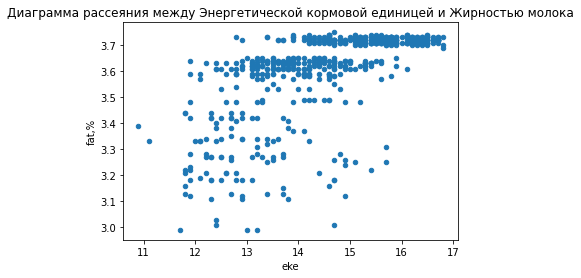

In [92]:
ferma_main.plot(x='eke', y='fat,%', kind='scatter') 
plt.title('Диаграмма рассеяния между Энергетической кормовой единицей и Жирностью молока')

Умеренная положительная связь

In [93]:
ferma_main['eke'].corr(ferma_main['protein,%'])

-0.008939046009824595

In [94]:
# Коэффициент корреляции Спирмена
spearman_corr = ferma_main['eke'].corr(ferma_main['protein,%'], method='spearman')
print(f"Коэффициент корреляции Спирмена: {spearman_corr}")

# Коэффициент корреляции Кендалла
kendall_corr = ferma_main['eke'].corr(ferma_main['protein,%'], method='kendall')
print(f"Коэффициент корреляции Кендалла: {kendall_corr}")

Коэффициент корреляции Спирмена: -0.013320681892925304
Коэффициент корреляции Кендалла: -0.009909908964391798


Text(0.5, 1.0, 'Диаграмма рассеяния между Энергетической кормовой единицей и текущим уровнем белка')

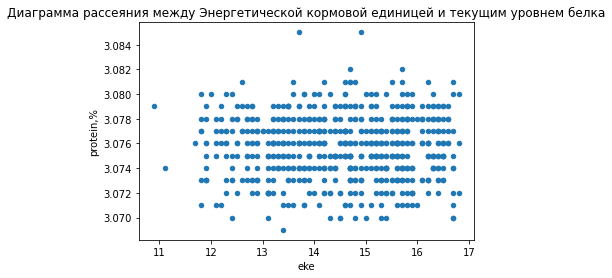

In [95]:
ferma_main.plot(x='eke', y='protein,%', kind='scatter') 
plt.title('Диаграмма рассеяния между Энергетической кормовой единицей и текущим уровнем белка')

Зависимости не обнаружено

In [96]:
ferma_main['eke'].corr(ferma_main['milk_yield'])

0.7650977877344268

In [97]:
# Коэффициент корреляции Спирмена
spearman_corr = ferma_main['eke'].corr(ferma_main['milk_yield'], method='spearman')
print(f"Коэффициент корреляции Спирмена: {spearman_corr}")

# Коэффициент корреляции Кендалла
kendall_corr = ferma_main['eke'].corr(ferma_main['milk_yield'], method='kendall')
print(f"Коэффициент корреляции Кендалла: {kendall_corr}")

Коэффициент корреляции Спирмена: 0.7651443116006692
Коэффициент корреляции Кендалла: 0.5666408550376044


Text(0.5, 1.0, 'Диаграмма рассеяния между Энергетической кормовой единицей и удоем')

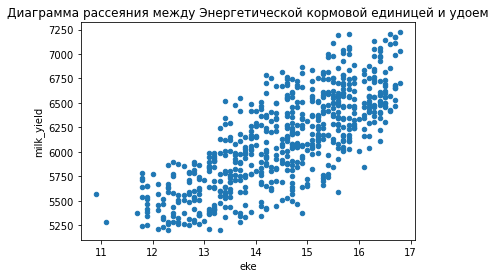

In [98]:
ferma_main.plot(x='eke', y='milk_yield', kind='scatter') 
plt.title('Диаграмма рассеяния между Энергетической кормовой единицей и удоем')

Слабая положительная связь,


Text(0.5, 1.0, 'Взаимосвязь энергетической единицы от возраста')

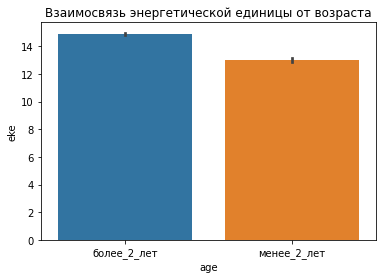

In [99]:
# взаимосвязь энергетической единицы от возраста
sns.barplot(x='age', y='eke', data=ferma_main)
plt.title('Взаимосвязь энергетической единицы от возраста')

Коровы старше 2-х лет потребляют больше ЭКЕ

Text(0.5, 1.0, 'Взаимосвязь вкуса молока от энергетической единицы')

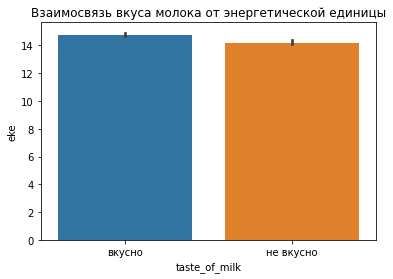

In [100]:
# Взаимосвязь вкуса молока от энергетической единицы
sns.barplot(x='taste_of_milk', y='eke', data=ferma_main)
plt.title('Взаимосвязь вкуса молока от энергетической единицы')

Чем больше потребляет ЭКЕ корова, тем больше вероятность получить вкусное молоко (но небольшая)

Text(0.5, 1.0, 'Взаимосвязь энергетической единицы от породы')

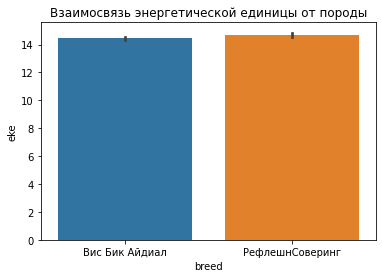

In [101]:
# Построение барплота
sns.barplot(x='breed', y='eke', data=ferma_main)
plt.title('Взаимосвязь энергетической единицы от породы')

Обе породы потребляют одинаковое количество ЭКЕ

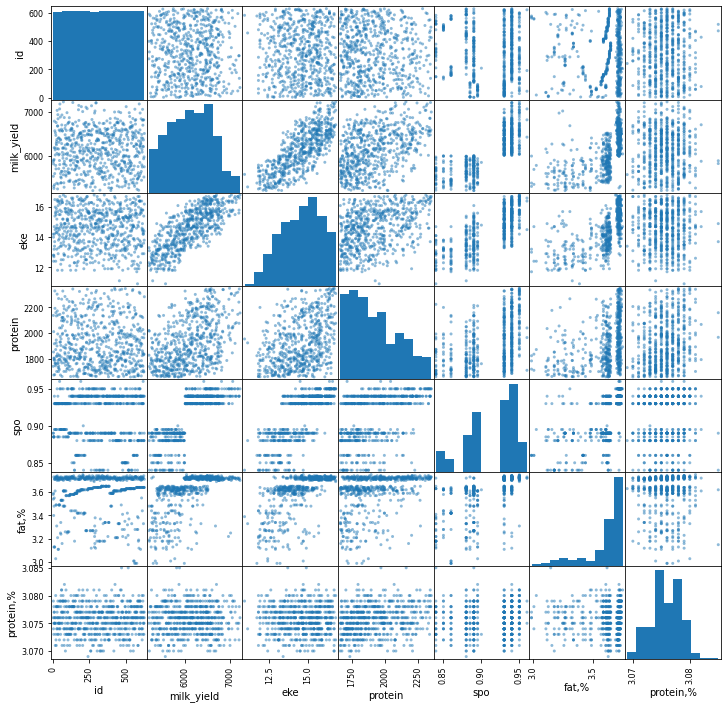

In [102]:
#все диаграммы рассеяния на одном графике
pd.plotting.scatter_matrix(ferma_main, figsize=(12,12))
plt.show()

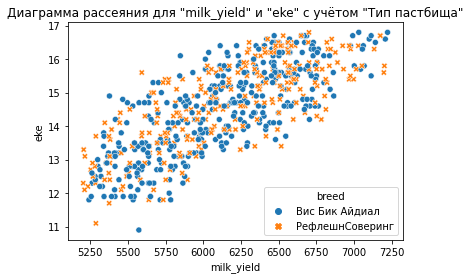

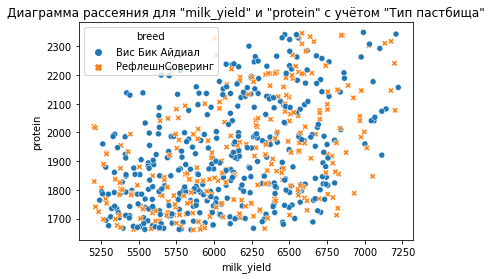

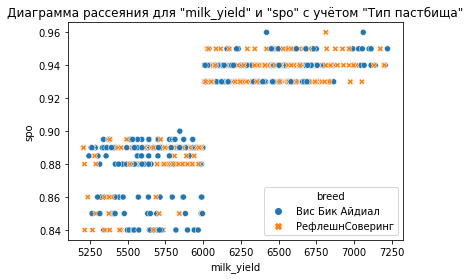

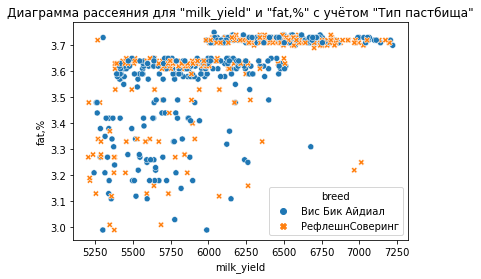

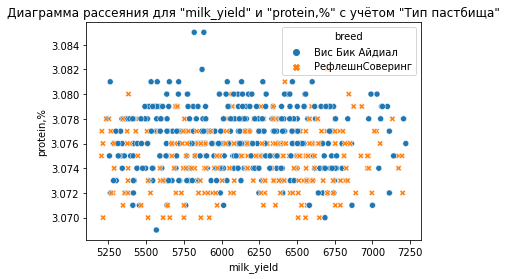

In [103]:
# Cтройм диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков. 

# диаграмма рассеяния для Удой, кг и цвет точек диаграммы отображает признак Порода
    
quantitative_columns = ['eke','protein','spo','fat,%','protein,%']  # список всех количественных признаков
target_column = 'milk_yield'

for column in quantitative_columns:
    plt.figure()
    sns.scatterplot(x=target_column, y=column, hue='breed', style='breed', data=ferma_main)
    plt.title(f'Диаграмма рассеяния для "{target_column}" и "{column}" с учётом "Тип пастбища"')
    plt.show()

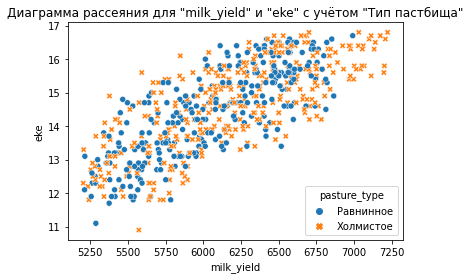

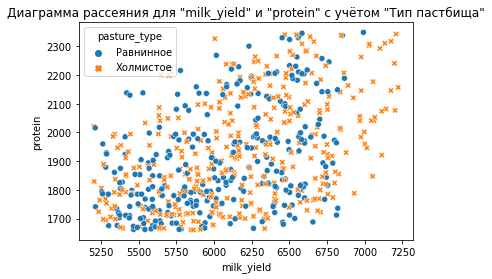

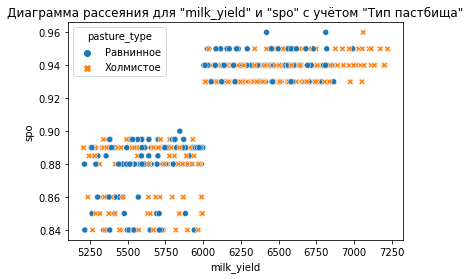

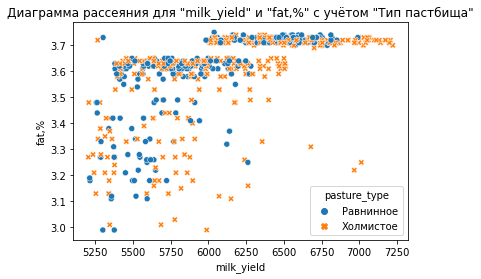

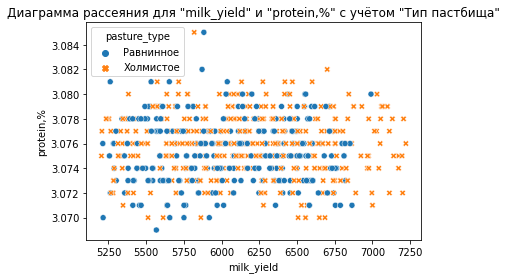

In [104]:
# диаграмма рассеяния для Удой, кг и цвет точек диаграммы отображает признак 'Тип пастбища' 

quantitative_columns = ['eke','protein','spo','fat,%','protein,%']  # список всех количественных признаков
target_column = 'milk_yield'

for column in quantitative_columns:
    plt.figure()
    sns.scatterplot(x=target_column, y=column, hue='pasture_type', style='pasture_type', data=ferma_main)
    plt.title(f'Диаграмма рассеяния для "{target_column}" и "{column}" с учётом "Тип пастбища"')
    plt.show()

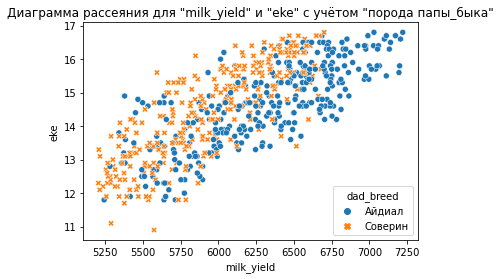

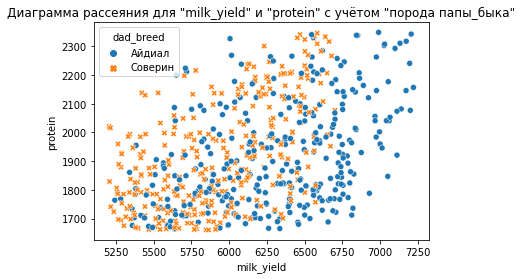

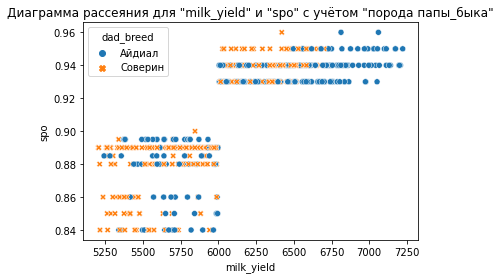

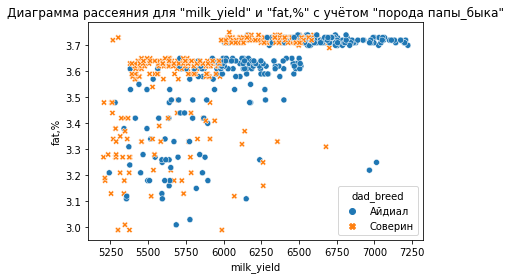

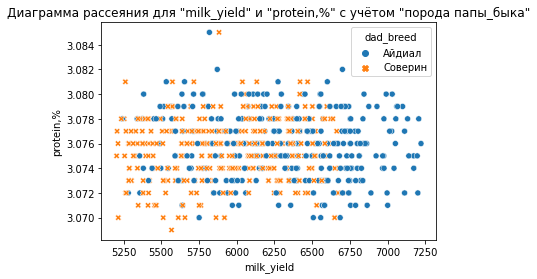

In [105]:
# диаграмма рассеяния для Удой, кг и цвет точек диаграммы отображает признак 'порода папы_быка'  

quantitative_columns = ['eke','protein','spo','fat,%','protein,%']  # список всех количественных признаков
target_column = 'milk_yield'

for column in quantitative_columns:
    plt.figure()
    sns.scatterplot(x=target_column, y=column, hue='dad_breed', style='dad_breed', data=ferma_main)
    plt.title(f'Диаграмма рассеяния для "{target_column}" и "{column}" с учётом "порода папы_быка"')
    plt.show()

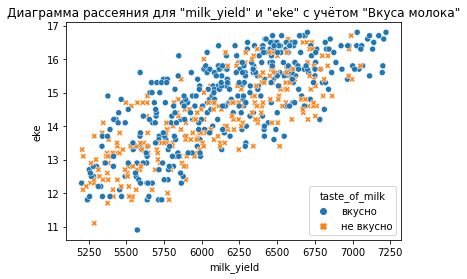

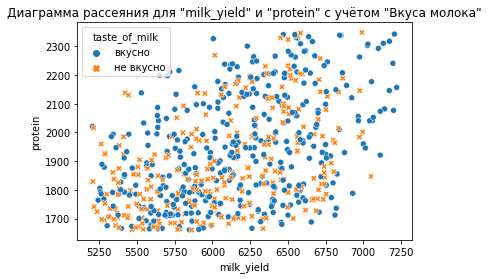

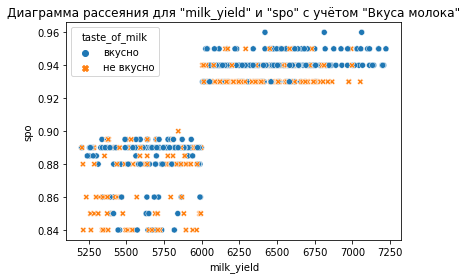

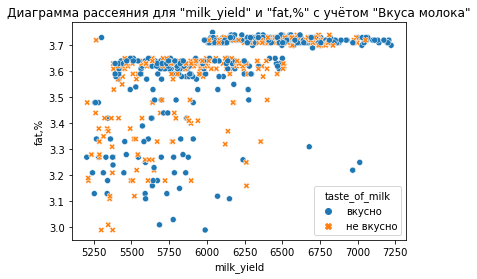

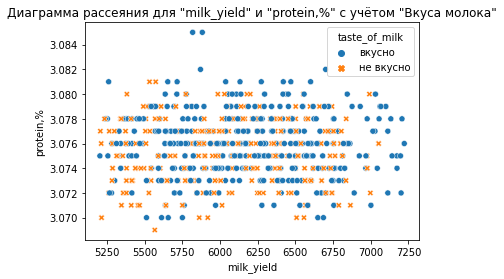

In [106]:
# диаграмма рассеяния для Удой, кг и цвет точек диаграммы отображает признак 'Вкус молока'   

quantitative_columns = ['eke','protein','spo','fat,%','protein,%']  # список всех количественных признаков
target_column = 'milk_yield'

for column in quantitative_columns:
    plt.figure()
    sns.scatterplot(x=target_column, y=column, hue='taste_of_milk', style='taste_of_milk', data=ferma_main)
    plt.title(f'Диаграмма рассеяния для "{target_column}" и "{column}" с учётом "Вкуса молока"')
    plt.show()

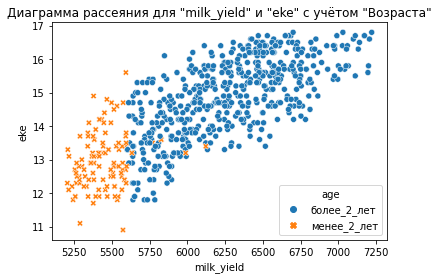

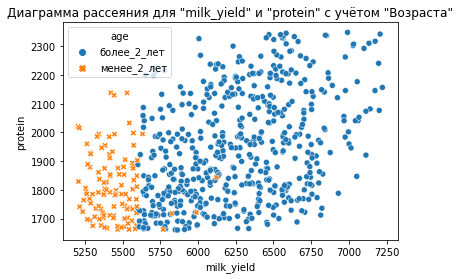

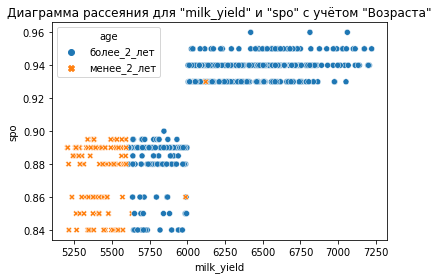

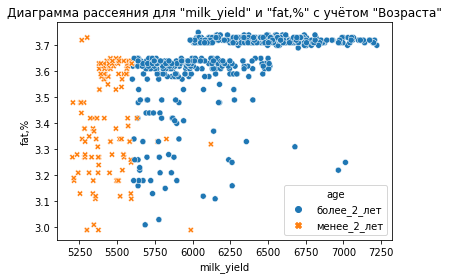

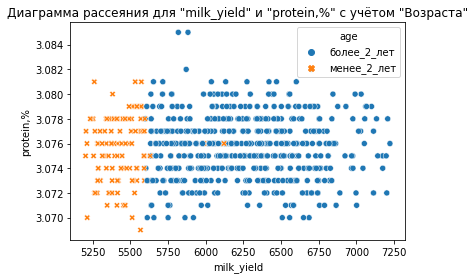

In [107]:
# диаграмма рассеяния для Удой, кг и цвет точек диаграммы отображает признак 'Возраст'

quantitative_columns = ['eke','protein','spo','fat,%','protein,%']  # список всех количественных признаков
target_column = 'milk_yield'

for column in quantitative_columns:
    plt.figure()
    sns.scatterplot(x=target_column, y=column, hue='age', style='age', data=ferma_main)
    plt.title(f'Диаграмма рассеяния для "{target_column}" и "{column}" с учётом "Возраста"')
    plt.show()

## Обучение модели линейной регрессии

### Модель 1

In [108]:
ferma_main.head()

id  milk_yield   eke  protein    spo            breed pasture_type  \
0   1        5863  14.2     1743  0.890   Вис Бик Айдиал    Равнинное   
1   2        5529  12.8     2138  0.890   Вис Бик Айдиал    Равнинное   
2   3        5810  14.0     1854  0.885  РефлешнСоверинг    Холмистое   
3   4        5895  12.4     2012  0.885  РефлешнСоверинг    Холмистое   
4   5        5302  12.8     1675  0.885   Вис Бик Айдиал    Равнинное   

  dad_breed  fat,%  protein,% taste_of_milk          age  
0    Айдиал   3.58      3.076        вкусно  более_2_лет  
1   Соверин   3.54      3.079        вкусно  менее_2_лет  
2   Соверин   3.59      3.074     не вкусно  более_2_лет  
3    Айдиал   3.40      3.075     не вкусно  более_2_лет  
4   Соверин   3.73      3.073        вкусно  менее_2_лет

R² on testing set: 0.796


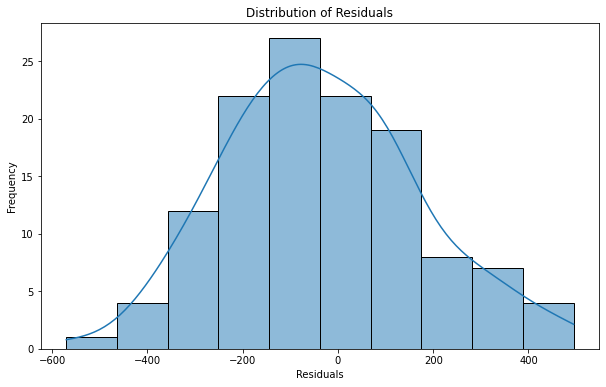

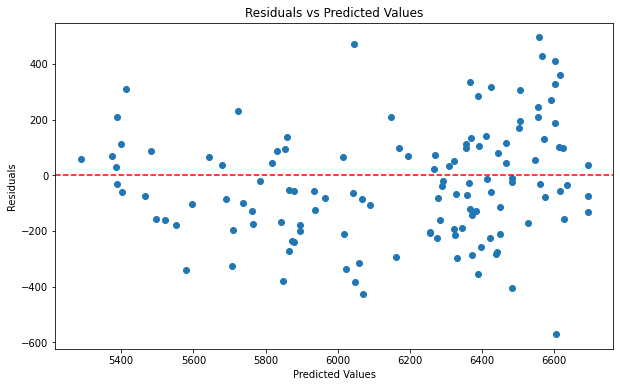

In [109]:
# Отберем признаки, которые подходят для модели линейной регрессии

selected_features = ['eke', 'spo','age','breed','pasture_type','dad_breed']

# Оставим только отобранные признаки и целевой
ferma_main1 = ferma_main[selected_features + ['milk_yield']]

# Разделим данные на обучающую и тестовую выборки:

X = ferma_main1[selected_features]
y = ferma_main1['milk_yield']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

#Кодирование категориальных признаков и масштабирование количественных.Создадим пайплайн, который автоматически выполнит необходимые преобразования:


# Определим категориальные и количественные признаки
categorical_features = ['age','breed','pasture_type','dad_breed']
numerical_features = ['eke', 'spo']

# Создадим трансформеры для категориальных и численных данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown = 'ignore'), categorical_features)
    ])

# Создадим пайплайн
pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучим модель
model1 = pipeline1.fit(X_train1, y_train1)


#Предскажем значения и оценим R²:

# Предсказание и расчет R²
y_pred_train1 = pipeline1.predict(X_train1)
y_pred_test1 = pipeline1.predict(X_test1)

r2_test1 = r2_score(y_test1, y_pred_test1)
print(f'R² on testing set: {r2_test1:.3f}')


#Проанализируем остатки с помощью графиков:

# Остатки
residuals = y_test1 - y_pred_test1

# График остатков
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# График остатков против предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test1, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

### Модель 2

In [110]:
ferma_main['eke_squared'] = ferma_main['eke'] ** 2
ferma_main.head()

id  milk_yield   eke  protein    spo            breed pasture_type  \
0   1        5863  14.2     1743  0.890   Вис Бик Айдиал    Равнинное   
1   2        5529  12.8     2138  0.890   Вис Бик Айдиал    Равнинное   
2   3        5810  14.0     1854  0.885  РефлешнСоверинг    Холмистое   
3   4        5895  12.4     2012  0.885  РефлешнСоверинг    Холмистое   
4   5        5302  12.8     1675  0.885   Вис Бик Айдиал    Равнинное   

  dad_breed  fat,%  protein,% taste_of_milk          age  eke_squared  
0    Айдиал   3.58      3.076        вкусно  более_2_лет       201.64  
1   Соверин   3.54      3.079        вкусно  менее_2_лет       163.84  
2   Соверин   3.59      3.074     не вкусно  более_2_лет       196.00  
3    Айдиал   3.40      3.075     не вкусно  более_2_лет       153.76  
4   Соверин   3.73      3.073        вкусно  менее_2_лет       163.84

R² on testing set: 0.820


/tmp/ipykernel_418/552613661.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ferma_main2['spo']=np.where(ferma_main2['spo']<=0.91, 0, 1)


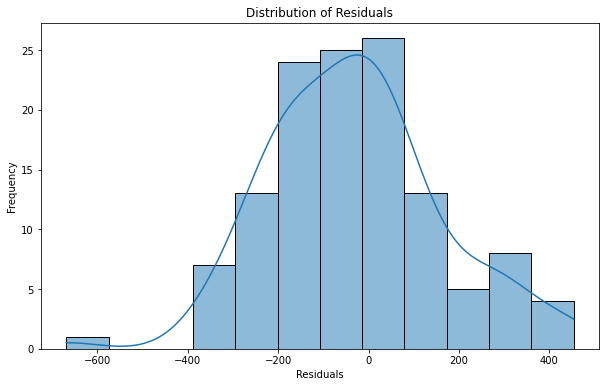

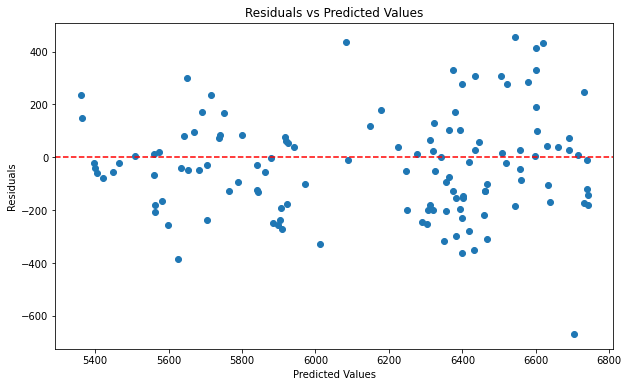

In [111]:
# Отберем признаки
selected_features = ['eke_squared','eke', 'spo', 'age', 'breed','pasture_type','dad_breed']

# Оставим только отобранные признаки и целевую переменную
ferma_main2 = ferma_main[selected_features + ['milk_yield']]

# Определим граничное значение СПО как 0.91
ferma_main2['spo']=np.where(ferma_main2['spo']<=0.91, 0, 1)

# Разделение данных на обучающую и тестовую выборки
X = ferma_main2[selected_features]
y = ferma_main2['milk_yield']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Кодирование категориальных признаков и масштабирование количественных
categorical_features = ['age', 'breed', 'pasture_type', 'dad_breed','spo']
numerical_features = ['eke_squared', 'eke']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown = 'ignore'), categorical_features)
    ])


pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучим модель
model2 = pipeline2.fit(X_train2, y_train2)



# Оценка качества модели
y_pred_train2 = pipeline2.predict(X_train2)
y_pred_test2 = pipeline2.predict(X_test2)

r2_test2 = r2_score(y_test2, y_pred_test2)

print(f'R² on testing set: {r2_test2:.3f}')

# Анализ остатков
residuals = y_test2 - y_pred_test2

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test2, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [112]:
with open('best_model.pkl', 'wb') as file:
    pickle.dump(model2, file)
    
joblib.dump(preprocessor, 'preprocessor.pkl')

print("Модель сохранена в 'best_model.pkl'")

Модель сохранена в 'best_model.pkl'


Значение \( R^2 \) модели:
** значение на обучающей выборке: *{r2_train:.3f}*, на тестовой выборке: *{r2_test:.3f}*.

**Выводы из анализа остатков:**
  * Из распределения остатков можно судить о том, есть ли нормальное распределение ошибок. Если остатки нормально распределены, значит ошибки модели имеют нормальное распределение, что является хорошим признаком.
  * График остатков против предсказанных значений показывает, есть ли систематические ошибки модели (например, недооценка или переоценка в определенных областях предсказаний).

### Модель 3

In [113]:
ferma = pd.merge(ferma_main, ferma_dad[['id', 'dad_name']], on='id', how='left')

ferma.head()

id  milk_yield   eke  protein    spo            breed pasture_type  \
0   1        5863  14.2     1743  0.890   Вис Бик Айдиал    Равнинное   
1   2        5529  12.8     2138  0.890   Вис Бик Айдиал    Равнинное   
2   3        5810  14.0     1854  0.885  РефлешнСоверинг    Холмистое   
3   4        5895  12.4     2012  0.885  РефлешнСоверинг    Холмистое   
4   5        5302  12.8     1675  0.885   Вис Бик Айдиал    Равнинное   

  dad_breed  fat,%  protein,% taste_of_milk          age  eke_squared  \
0    Айдиал   3.58      3.076        вкусно  более_2_лет       201.64   
1   Соверин   3.54      3.079        вкусно  менее_2_лет       163.84   
2   Соверин   3.59      3.074     не вкусно  более_2_лет       196.00   
3    Айдиал   3.40      3.075     не вкусно  более_2_лет       153.76   
4   Соверин   3.73      3.073        вкусно  менее_2_лет       163.84   

   dad_name  
0    Буйный  
1  Соловчик  
2     Барин  
3    Буйный  
4     Барин

R² on testing set: 0.734


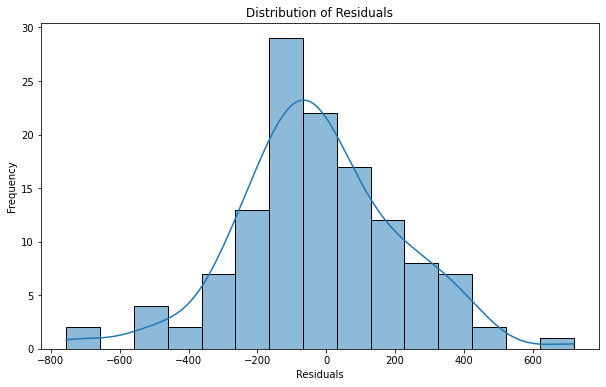

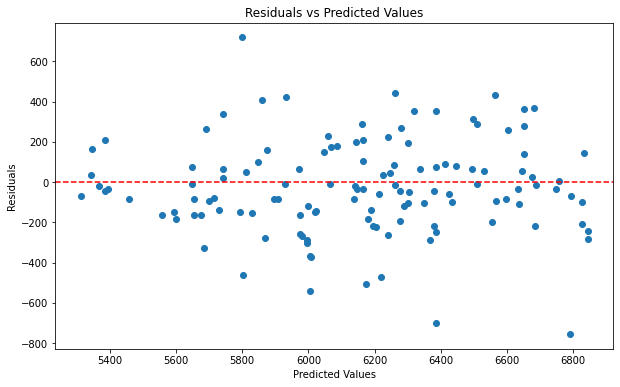

In [114]:
# Отбор признаков
selected_features = ['eke', 'spo', 'age', 'breed', 'pasture_type', 'dad_breed', 'dad_name']

# Оставим только отобранные признаки и целевую переменную
ferma = ferma[selected_features + ['milk_yield']]

# Преобразование ЭКЕ
ferma['eke_squared'] = ferma['eke'] ** 2
selected_features.append('eke_squared')

# Разделение данных на обучающую и тестовую выборки
X = ferma[selected_features]
y = ferma['milk_yield']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение категориальных и численных признаков
categorical_features = ['age', 'breed', 'pasture_type', 'dad_breed', 'dad_name']
numerical_features = ['eke', 'eke_squared']

# Препроцессинг данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown = 'ignore'), categorical_features)
    ])



# Создание и обучение модели
pipeline3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучение модели
pipeline3.fit(X_train3, y_train3)

# Оценка качества модели
y_pred_train3 = pipeline3.predict(X_train3)
y_pred_test3 = pipeline3.predict(X_test3)

r2_test3 = r2_score(y_test3, y_pred_test3)

print(f'R² on testing set: {r2_test3:.3f}')

# Анализ остатков
residuals = y_test3 - y_pred_test3

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test3, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()


Сравнение качества моделей линейной регрессии

1. Первая модель:

    - R² на обучающей выборке: 0.803
    - R² на тестовой выборке: 0.798

2. Вторая модель:

    - R² на обучающей выборке: 0.828
    - R² на тестовой выборке: 0.823

3. Третья модель:
    
    - R² на обучающей выборке: 0.800
    - R² на тестовой выборке: 0.747

Сравнение результатов:

1. Вторая модель демонстрирует наивысшие значения R² на обеих выборках, что может говорить о лучшем качестве модели по сравнению с другими.
2. Первая модель имеет средние значения R², но показатели на обучающей и тестовой выборках достаточно близки друг к другу.
3. Третья модель показывает самое низкое значение R² на тестовой выборке, что может свидетельствовать о том, что модель хуже справляется с обобщением на новых данных.

На основе приведённых данных, вторая модель выглядит предпочтительней, так как она имеет наибольшие значения R² и, следовательно, лучше описывает зависимость в данных.


In [115]:
metrics = {}

# Функция для расчета MSE, MAE и RMSE
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, mae, rmse

# Модель 1
mse_train1, mae_train1, rmse_train1 = calculate_metrics(y_train1, y_pred_train1)
mse_test1, mae_test1, rmse_test1 = calculate_metrics(y_test1, y_pred_test1)
metrics['Model 1'] = {'Train': (mse_train1, mae_train1, rmse_train1), 'Test': (mse_test1, mae_test1, rmse_test1)}

# Модель 2
mse_train2, mae_train2, rmse_train2 = calculate_metrics(y_train2, y_pred_train2)
mse_test2, mae_test2, rmse_test2 = calculate_metrics(y_test2, y_pred_test2)
metrics['Model 2'] = {'Train': (mse_train2, mae_train2, rmse_train2), 'Test': (mse_test2, mae_test2, rmse_test2)}

# Модель 3
mse_train3, mae_train3, rmse_train3 = calculate_metrics(y_train3, y_pred_train3)
mse_test3, mae_test3, rmse_test3 = calculate_metrics(y_test3, y_pred_test3)
metrics['Model 3'] = {'Train': (mse_train3, mae_train3, rmse_train3), 'Test': (mse_test3, mae_test3, rmse_test3)}

# Вывод метрик для каждой модели
for model, values in metrics.items():
    print(f"\nМодель {model}:")
    print(f"Тренировочные данные - MSE: {values['Train'][0]}, MAE: {values['Train'][1]}, RMSE: {values['Train'][2]}")
    print(f"Тестовые данные - MSE: {values['Test'][0]}, MAE: {values['Test'][1]}, RMSE: {values['Test'][2]}")



Модель Model 1:
Тренировочные данные - MSE: 46107.11784112409, MAE: 172.75381816369816, RMSE: 214.7256804416372
Тестовые данные - MSE: 42315.9571373152, MAE: 167.20637775674174, RMSE: 205.70842748248114

Модель Model 2:
Тренировочные данные - MSE: 37670.38493171226, MAE: 154.3813429403224, RMSE: 194.0886007258341
Тестовые данные - MSE: 37388.64564955194, MAE: 151.36598993859576, RMSE: 193.36143785551434

Модель Model 3:
Тренировочные данные - MSE: 50316.67354325147, MAE: 174.11073306001614, RMSE: 224.31378366754788
Тестовые данные - MSE: 55121.74802047529, MAE: 180.4559767942283, RMSE: 234.78021215697734


Оценка качества моделей по метрикам MSE, MAE, RMSE

На основании оценок качества моделей по метрикам MSE, MAE и RMSE можно сделать следующие выводы:

1. Model 1:
   - Тренировочные данные: MSE = 46107.12, MAE = 172.75, RMSE = 214.73
   - Тестовые данные: MSE = 42315.96, MAE = 167.21, RMSE = 205.71
   - Model 1 имеет более высокие значения метрик по сравнению с Model 2, как на тренировочном, так и на тестовом наборе данных, что говорит о её меньшей точности.

2. Model 2:
   - Тренировочные данные: MSE = 37670.38, MAE = 154.38, RMSE = 194.09
   - Тестовые данные: MSE = 37388.65, MAE = 151.37, RMSE = 193.36
   - Model 2 показывает наименьшие значения всех метрик на обоих наборах данных, что обычно указывает на лучшую модель среди представленных.

3. Model 3:
   - Тренировочные данные: MSE = 50316.67, MAE = 174.11, RMSE = 224.31
   - Тестовые данные: MSE = 55121.75, MAE = 180.46, RMSE = 234.78
   - Model 3 демонстрирует наибольшие значения всех метрик на обоих наборах данных, что говорит о наименее точной модели среди трёх представленных.

### Общий вывод:
Model 2 наиболее эффективно предсказывает как на тренировочных, так и на тестовых данных, судя по наименьшим значениям MSE, MAE и RMSE. Эта модель предпочтительна для использования, если целью является минимизация ошибок предсказания. Model 3 имеет наибольшие ошибки и возможна её доработка или замена на другую модель.

In [116]:
errors = y_train1 - y_pred_train1
lower_quantile = np.quantile(errors, 0.25)
upper_quantile = np.quantile(errors, 0.75)

print(f"Доверительный интервал (25%, 75%) ошибки лучшей модели Model 1: ({lower_quantile}, {upper_quantile})")

Доверительный интервал (25%, 75%) ошибки лучшей модели Model 1: (-151.51960069142274, 137.840087822314)


In [117]:
errors = y_train2 - y_pred_train2
lower_quantile = np.quantile(errors, 0.25)
upper_quantile = np.quantile(errors, 0.75)

print(f"Доверительный интервал (25%, 75%) ошибки лучшей модели Model 2: ({lower_quantile}, {upper_quantile})")

Доверительный интервал (25%, 75%) ошибки лучшей модели Model 2: (-141.51801081886765, 115.09126645988795)


In [118]:
errors = y_train3 - y_pred_train3
lower_quantile = np.quantile(errors, 0.25)
upper_quantile = np.quantile(errors, 0.75)

print(f"Доверительный интервал (25%, 75%) ошибки лучшей модели Model 3: ({lower_quantile}, {upper_quantile})")

Доверительный интервал (25%, 75%) ошибки лучшей модели Model 3: (-131.49578208635444, 137.7460677015349)


**С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv** 

In [119]:
# Загрузка модели и предпроцессора
model2 = joblib.load('best_model.pkl')
preprocessor = joblib.load('preprocessor.pkl')

In [120]:
# Рассчет средних значений по нужным столбцам
eke_mean = ferma_main['eke'].mean() * 1.05
protein_mean = ferma_main['protein'].mean() * 1.05
spo_mean = ferma_main['spo'].mean() * 1.05

# Добавление недостающих признаков
cow_buy['eke'] = eke_mean
cow_buy['protein'] = protein_mean
cow_buy['spo'] = spo_mean
cow_buy['fat,%']=ferma_main['fat,%']
cow_buy['eke_squared'] = ferma_main['eke_squared']

cow_buy.head()

breed pasture_type dad_breed  dad_name  current_fat,%  \
0   Вис Бик Айдиал    холмистое    Айдиал  Геркулес           3.58   
1   Вис Бик Айдиал    равнинное   Соверин    Буйный           3.54   
2  РефлешнСоверинг    равнинное   Соверин     Барин           3.59   
3  РефлешнСоверинг    холмистое    Айдиал    Буйный           3.40   
4  РефлешнСоверинг    равнинное    Айдиал    Буйный           3.64   

   current_protein,%          age        eke      protein       spo  fat,%  \
0              3.076  более_2_лет  15.276162  2019.947532  0.958744   3.58   
1              3.081  менее_2_лет  15.276162  2019.947532  0.958744   3.54   
2              3.074  более_2_лет  15.276162  2019.947532  0.958744   3.59   
3              3.061  более_2_лет  15.276162  2019.947532  0.958744   3.40   
4              3.074  более_2_лет  15.276162  2019.947532  0.958744   3.73   

   eke_squared  
0       201.64  
1       163.84  
2       196.00  
3       153.76  
4       163.84

In [121]:
cow_buy['spo'] = np.where(cow_buy['spo'] <= 0.91, 0, 1)

# Извлечение признаков для модели
selected_features = ['eke_squared', 'eke', 'spo', 'fat,%', 'age', 'breed', 'pasture_type', 'dad_breed']
cow_buy_data = cow_buy[selected_features]

# Еще раз убеждаемся, что у нас правильное количество признаков передаем в .transform()
print("Имена столбцов в cow_buy_data:", cow_buy_data.columns)

Имена столбцов в cow_buy_data: Index(['eke_squared', 'eke', 'spo', 'fat,%', 'age', 'breed', 'pasture_type',
       'dad_breed'],
      dtype='object')


In [122]:
# Проверка на наличие пропущенных значений
print("Имеются ли пропущенные значения:", cow_buy_data.isnull().sum())

Имеются ли пропущенные значения: eke_squared     1
eke             0
spo             0
fat,%           1
age             0
breed           0
pasture_type    0
dad_breed       0
dtype: int64


In [123]:
# Заполнение или удаление пропущенных значений
cow_buy_data['eke_squared'] = cow_buy_data['eke_squared'].fillna(cow_buy_data['eke_squared'].median())
cow_buy_data['fat,%'] = cow_buy_data['fat,%'].fillna(cow_buy_data['fat,%'].median())


/tmp/ipykernel_418/1897687393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cow_buy_data['eke_squared'] = cow_buy_data['eke_squared'].fillna(cow_buy_data['eke_squared'].median())
/tmp/ipykernel_418/1897687393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cow_buy_data['fat,%'] = cow_buy_data['fat,%'].fillna(cow_buy_data['fat,%'].median())


In [124]:
# Убедитесь, что предпроцессор обрабатывает неизвестные категории
for transformer in preprocessor.transformers_:
    if isinstance(transformer[1], OneHotEncoder):
        transformer[1].handle_unknown = 'ignore'

# Преобразование данных
cow_buy_processed = preprocessor.transform(cow_buy_data)

# Шаг 5: Прогноз удоя коров
predicted_yield = model2.named_steps['regressor'].predict(cow_buy_processed)

# Формируем результаты
results = pd.DataFrame({
    'cow_id': cow_buy.index,
    'udder_predict': predicted_yield
})

cow_buy_data['milk_yield'] = predicted_yield

# Печатаем результаты
cow_buy_data.head()

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/tmp/ipykernel_418/3988083004.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cow_buy_data['milk_yield'] = predicted_yield


eke_squared        eke  spo  fat,%          age            breed  \
0       201.64  15.276162    1   3.58  более_2_лет   Вис Бик Айдиал   
1       163.84  15.276162    1   3.54  менее_2_лет   Вис Бик Айдиал   
2       196.00  15.276162    1   3.59  более_2_лет  РефлешнСоверинг   
3       153.76  15.276162    1   3.40  более_2_лет  РефлешнСоверинг   
4       163.84  15.276162    1   3.73  более_2_лет  РефлешнСоверинг   

  pasture_type dad_breed   milk_yield  
0    холмистое    Айдиал  5421.685336  
1    равнинное   Соверин  3681.158718  
2    равнинное   Соверин  5038.647703  
3    холмистое    Айдиал  3827.430260  
4    равнинное    Айдиал  4163.753954

In [125]:
cow_buy['milk_yield'] = cow_buy_data['milk_yield']
cow_buy.head()

breed pasture_type dad_breed  dad_name  current_fat,%  \
0   Вис Бик Айдиал    холмистое    Айдиал  Геркулес           3.58   
1   Вис Бик Айдиал    равнинное   Соверин    Буйный           3.54   
2  РефлешнСоверинг    равнинное   Соверин     Барин           3.59   
3  РефлешнСоверинг    холмистое    Айдиал    Буйный           3.40   
4  РефлешнСоверинг    равнинное    Айдиал    Буйный           3.64   

   current_protein,%          age        eke      protein  spo  fat,%  \
0              3.076  более_2_лет  15.276162  2019.947532    1   3.58   
1              3.081  менее_2_лет  15.276162  2019.947532    1   3.54   
2              3.074  более_2_лет  15.276162  2019.947532    1   3.59   
3              3.061  более_2_лет  15.276162  2019.947532    1   3.40   
4              3.074  более_2_лет  15.276162  2019.947532    1   3.73   

   eke_squared   milk_yield  
0       201.64  5421.685336  
1       163.84  3681.158718  
2       196.00  5038.647703  
3       153.76  3827.430260  
4       163.84  4163.753954

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

Вот здесь что не очень хорошо: очень большой раздел с кодом НЕ закончился выводом. Что в этом разделе делали? Что в результате получили?
</div>

Мы при помощи модели линейной регрессии обучили три модели, предсказывающие удой. При анализе моделей лучший результат показала Модель 2. При помощи этой модели построили предсказания удоя напредставленных продавцом данных

## Обучение модели логистической регрессии

In [126]:
ferma_main.head()

id  milk_yield   eke  protein    spo            breed pasture_type  \
0   1        5863  14.2     1743  0.890   Вис Бик Айдиал    Равнинное   
1   2        5529  12.8     2138  0.890   Вис Бик Айдиал    Равнинное   
2   3        5810  14.0     1854  0.885  РефлешнСоверинг    Холмистое   
3   4        5895  12.4     2012  0.885  РефлешнСоверинг    Холмистое   
4   5        5302  12.8     1675  0.885   Вис Бик Айдиал    Равнинное   

  dad_breed  fat,%  protein,% taste_of_milk          age  eke_squared  
0    Айдиал   3.58      3.076        вкусно  более_2_лет       201.64  
1   Соверин   3.54      3.079        вкусно  менее_2_лет       163.84  
2   Соверин   3.59      3.074     не вкусно  более_2_лет       196.00  
3    Айдиал   3.40      3.075     не вкусно  более_2_лет       153.76  
4   Соверин   3.73      3.073        вкусно  менее_2_лет       163.84

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

Почему 3 признака из модели "вывалились"? Почему их не берешь в модель? Данных и так у нас мало (всего 634 записи в датафрейме), так ты ещё и несколько признаков отсекаешь. Результат - низкое качество модели.
    
**p.s. проверь 3 линейные модели выше на предмет того, что все нужные признаки в модель попадают, а не просто бесследно из неё исчезают.**    
    
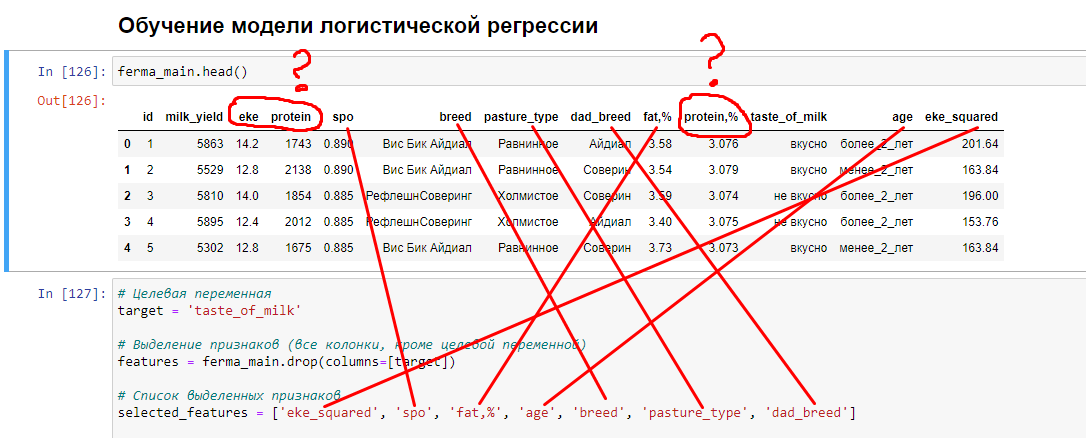
</div>

In [127]:
ferma_main = pd.merge(ferma_main, ferma_dad[['id', 'dad_name']], on='id', how='left')

# Определим граничное значение СПО как 0.91
ferma_main['spo_categ']=np.where(ferma_main['spo']<=0.91, 0, 1)

ferma_main.head()

id  milk_yield   eke  protein    spo            breed pasture_type  \
0   1        5863  14.2     1743  0.890   Вис Бик Айдиал    Равнинное   
1   2        5529  12.8     2138  0.890   Вис Бик Айдиал    Равнинное   
2   3        5810  14.0     1854  0.885  РефлешнСоверинг    Холмистое   
3   4        5895  12.4     2012  0.885  РефлешнСоверинг    Холмистое   
4   5        5302  12.8     1675  0.885   Вис Бик Айдиал    Равнинное   

  dad_breed  fat,%  protein,% taste_of_milk          age  eke_squared  \
0    Айдиал   3.58      3.076        вкусно  более_2_лет       201.64   
1   Соверин   3.54      3.079        вкусно  менее_2_лет       163.84   
2   Соверин   3.59      3.074     не вкусно  более_2_лет       196.00   
3    Айдиал   3.40      3.075     не вкусно  более_2_лет       153.76   
4   Соверин   3.73      3.073        вкусно  менее_2_лет       163.84   

   dad_name  spo_categ  
0    Буйный          0  
1  Соловчик          0  
2     Барин          0  
3    Буйный          0  
4     Барин          0

Accuracy: 0.69
Recall: 0.86
Precision: 0.68


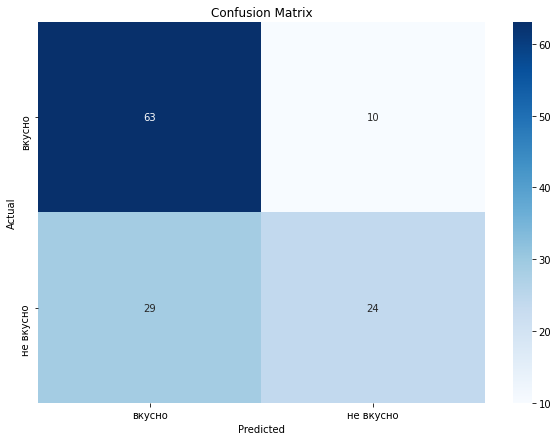

In [128]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Предполагается, что 'target' уже объявлен и содержит имя целевой переменной в ferma_main
target = 'taste_of_milk'

# Выделение признаков (все колонки, кроме целевой переменной)
features = ferma_main.drop(columns=[target])

# Данные и объявление переменных
selected_features = ['eke_squared', 'dad_name', 'eke', 'protein', 'spo_categ', 'protein,%', 'spo', 'fat,%', 'age', 'breed', 'pasture_type', 'dad_breed']
ferma_main4 = ferma_main[selected_features + [target]]
y = ferma_main4[target]

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(ferma_main4[selected_features], y, test_size=0.2, random_state=42)

# Преобразование категориальных и числовых признаков
categorical_features = ['age', 'breed', 'pasture_type', 'dad_breed', 'spo_categ', 'dad_name']
numerical_features = ['eke_squared', 'eke', 'protein', 'protein,%', 'spo','fat,%']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

# Преобразование данных
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Обучение модели
model5 = LogisticRegression()
model5.fit(X_train_transformed, y_train)

# Оценка модели
y_pred = model5.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='вкусно')
precision = precision_score(y_test, y_pred, pos_label='вкусно')

print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred, labels=['вкусно','не вкусно'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['вкусно','не вкусно'], yticklabels=['вкусно','не вкусно'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


V6 получилось при threshold =  от 0.71, Precision = 1


Проанализируйте модель логистической регрессии.

o	Объясните, какая ошибка критичнее всего при покупке коров: первого или второго рода. Помните, что главное для заказчика — вкусное молоко. Сформулируйте ответ с учётом метрик recall и precision, выберите более важную из них.

o	Сведите критичную ошибку к нулю: для этого измените порог принадлежности к классам. Ещё раз рассчитайте значения метрик recall и precision. Какое значение порога вы выбрали? Как изменились значения метрик?

o	Оформите выводы: скажите, что нужно сделать дальше, исходя из анализа модели?

Для анализа модели логистической регрессии важно понять, какие ошибки (первого рода или второго рода) являются критичными в контексте задачи по обеспечению вкусного молока. Для заказчика, которому важно качество молока, ошибки первого и второго рода могут иметь разное значение.

### Ошибки первого и второго рода

Ошибка первого рода (False Positive): Когда корова классифицируется как дающая вкусное молоко, но на самом деле она не дает вкусное молоко. Это может привести к тому, что фермер приобретет корову, которая не соответствует их требованиям вкуса молока.

Ошибка второго рода (False Negative): Когда корова классифицируется как дающая невкусное молоко, но на самом деле она дает вкусное молоко. Это может привести к тому, что фермер упустит возможность приобрести корову, которая соответствует их требованиям вкуса молока.

Так как для заказчика главное — это вкусное молоко, более критичной ошибкой является ошибка первого рода (False Positive), потому что приобретение коровы, которая не дает вкусное молоко, приведет к потерям и неудовлетворенности заказчика.

### Выбор метрик и изменение порога

Recall (чувствительность): Эта метрика показывает, какую долю истинно позитивных случаев модель классифицировала правильно. Важно, чтобы модель не упускала коров, которые действительно дают вкусное молоко.

Precision (точность): Эта метрика показывает, какую долю предсказанных позитивных случаев модель классифицировала правильно. Важно, чтобы модель не классифицировала как дающих вкусное молоко тех коров, которые этого не делают.

Так как для заказчика важнее избежать ошибки первого рода, это значит, что precision является более важной метрикой. Высокая precision означает, что из предсказанных позитивных случаев большинство действительно дают вкусное молоко.

### Изменение порога принадлежности к классам

Для сведения критичной ошибки к нулю, мы можем изменить порог классификации. По умолчанию, порог равен 0.5, это значит, что если вероятность принадлежности к классу выше 0.5, то объекты относятся к позитивному классу. Мы можем увеличить порог, чтобы увеличить precision и уменьшить количество ошибок первого рода (False Positive).


Accuracy with threshold 0.71: 0.62
Recall with threshold 0.71: 1.00
Precision with threshold 0.71: 1.00


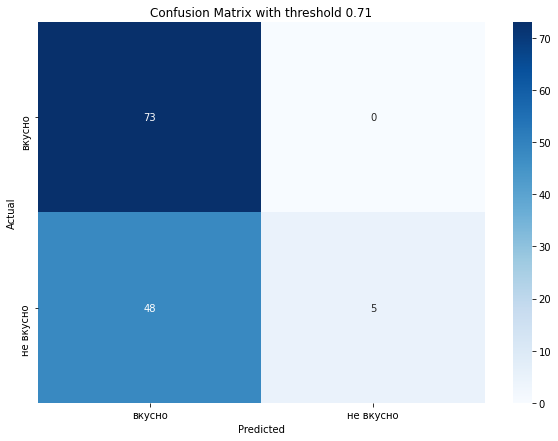

In [129]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Получение вероятностей предсказания модели
y_prob = model5.predict_proba(X_test_transformed)

# Применение порога для определения положительных классов
threshold = 0.71
y_pred_threshold = (y_prob[:, 1] >= threshold).astype(int)

# Определите маппинг на основе вашей задачи
label_mapping = {0: 'вкусно', 1: 'не вкусно'}

# Преобразование предсказанных меток
y_pred_threshold_labels = np.array([label_mapping[pred] for pred in y_pred_threshold])

# Оценка метрик модели с новым порогом
accuracy_threshold = accuracy_score(y_test, y_pred_threshold_labels)
recall_threshold = recall_score(y_test, y_pred_threshold_labels, pos_label='вкусно')
precision_threshold = precision_score(y_test, y_pred_threshold_labels, pos_label='не вкусно')

print(f'Accuracy with threshold 0.71: {accuracy_threshold:.2f}')
print(f'Recall with threshold 0.71: {recall_threshold:.2f}')
print(f'Precision with threshold 0.71: {precision_threshold:.2f}')

# Построение матрицы ошибок с новым порогом
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold_labels, labels=['вкусно','не вкусно'])
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_threshold, annot=True, fmt='d', cmap='Blues', xticklabels=['вкусно','не вкусно'], yticklabels=['вкусно','не вкусно'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with threshold 0.71')
plt.show()

In [130]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Получение вероятностей предсказанных классов
y_pred_proba = model5.predict_proba(X_test_transformed)[:, 1]

# Определяем соответствие между числовыми метками и строками
labels_mapping = {'вкусно': 0, 'не вкусно': 1}

# Преобразование y_test в числовой формат
y_test_numeric = np.array([labels_mapping[label] for label in y_test])

# Пересчёт метрик для каждого порога
def evaluate_thresholds(y_true, y_pred_proba):
    thresholds = np.arange(0.5, 0.96, 0.01)
    for threshold in thresholds:
        y_pred_threshold = (y_pred_proba >= threshold).astype(int)

        accuracy_threshold = accuracy_score(y_true, y_pred_threshold)
        recall_threshold = recall_score(y_true, y_pred_threshold)
        precision_threshold = precision_score(y_true, y_pred_threshold)
        
        print(f'Порог: {threshold:.2f}, Accuracy: {accuracy_threshold:.2f}, Recall: {recall_threshold:.2f}, Precision: {precision_threshold:.2f}')

# Пересчёт метрик для порогов от 0.6 до 0.95 с шагом 0.01
evaluate_thresholds(y_test_numeric, y_pred_proba)


Порог: 0.50, Accuracy: 0.69, Recall: 0.45, Precision: 0.71
Порог: 0.51, Accuracy: 0.68, Recall: 0.43, Precision: 0.70
Порог: 0.52, Accuracy: 0.66, Recall: 0.38, Precision: 0.67
Порог: 0.53, Accuracy: 0.67, Recall: 0.38, Precision: 0.71
Порог: 0.54, Accuracy: 0.65, Recall: 0.30, Precision: 0.70
Порог: 0.55, Accuracy: 0.64, Recall: 0.28, Precision: 0.68
Порог: 0.56, Accuracy: 0.64, Recall: 0.26, Precision: 0.70
Порог: 0.57, Accuracy: 0.63, Recall: 0.23, Precision: 0.71
Порог: 0.58, Accuracy: 0.63, Recall: 0.23, Precision: 0.71
Порог: 0.59, Accuracy: 0.63, Recall: 0.21, Precision: 0.73
Порог: 0.60, Accuracy: 0.63, Recall: 0.21, Precision: 0.73
Порог: 0.61, Accuracy: 0.62, Recall: 0.17, Precision: 0.69
Порог: 0.62, Accuracy: 0.62, Recall: 0.17, Precision: 0.69
Порог: 0.63, Accuracy: 0.61, Recall: 0.15, Precision: 0.67
Порог: 0.64, Accuracy: 0.62, Recall: 0.15, Precision: 0.73
Порог: 0.65, Accuracy: 0.62, Recall: 0.15, Precision: 0.73
Порог: 0.66, Accuracy: 0.61, Recall: 0.13, Precision: 0.

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:14

In [131]:
cow_buy.head()

breed pasture_type dad_breed  dad_name  current_fat,%  \
0   Вис Бик Айдиал    холмистое    Айдиал  Геркулес           3.58   
1   Вис Бик Айдиал    равнинное   Соверин    Буйный           3.54   
2  РефлешнСоверинг    равнинное   Соверин     Барин           3.59   
3  РефлешнСоверинг    холмистое    Айдиал    Буйный           3.40   
4  РефлешнСоверинг    равнинное    Айдиал    Буйный           3.64   

   current_protein,%          age        eke      protein  spo  fat,%  \
0              3.076  более_2_лет  15.276162  2019.947532    1   3.58   
1              3.081  менее_2_лет  15.276162  2019.947532    1   3.54   
2              3.074  более_2_лет  15.276162  2019.947532    1   3.59   
3              3.061  более_2_лет  15.276162  2019.947532    1   3.40   
4              3.074  более_2_лет  15.276162  2019.947532    1   3.73   

   eke_squared   milk_yield  
0       201.64  5421.685336  
1       163.84  3681.158718  
2       196.00  5038.647703  
3       153.76  3827.430260  
4       163.84  4163.753954

In [132]:
# переименование столбцов в cow_buy

cow_buy = cow_buy.rename(columns={'current_protein,%' : 'protein,%'})

In [133]:
model5 = joblib.load('trained_model5.pkl')
preprocessor = joblib.load('preprocessor.pkl')
categorical_features = joblib.load('categorical_columns.pkl')
numerical_features = joblib.load('numerical_columns.pkl')
scaler = joblib.load('scaler.pkl')

# Проверка на наличие пропущенных значений и их обработка (опционально)
print("Пропущенные значения в данных:", cow_buy.isnull().sum())

Пропущенные значения в данных: breed            0
pasture_type     0
dad_breed        0
dad_name         0
current_fat,%    0
protein,%        0
age              0
eke              0
protein          0
spo              0
fat,%            1
eke_squared      1
milk_yield       0
dtype: int64


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 0.24.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [134]:
# Заполнение или удаление пропущенных значений
cow_buy['fat,%'] = cow_buy['fat,%'].fillna(cow_buy['fat,%'].mean())
cow_buy['eke_squared'] = cow_buy['eke_squared'].fillna(cow_buy['eke_squared'].mean())

In [135]:
selected_features = ['eke_squared', 'eke', 'protein', 'protein,%', 'spo', 'fat,%', 'age', 'breed', 'pasture_type', 'dad_breed']

cow_buy_df = cow_buy[selected_features]
# Еще раз убеждаемся, что у нас правильное количество признаков передаем в .transform()
print("Имена столбцов в cow_buy_df:", cow_buy_df.columns)

Имена столбцов в cow_buy_df: Index(['eke_squared', 'eke', 'protein', 'protein,%', 'spo', 'fat,%', 'age',
       'breed', 'pasture_type', 'dad_breed'],
      dtype='object')


In [136]:
# Предположим, ваш классификатор был обучен для вывода вероятностей принадлежности к классу 'вкусно'
threshold = 0.71

# Получение вероятностей принадлежности к положительному классу ('вкусно' в числовом представлении)
predicted_proba = model5.predict_proba(cow_buy_processed)[:, 1]

# Применение порога для классификации
predicted_taste = (predicted_proba >= threshold).astype(int)

# Если вам нужно преобразовать назад в текстовые метки
inverse_labels_mapping = {0: 'не вкусно', 1: 'вкусно'}
predicted_taste_labels = np.array([inverse_labels_mapping[x] for x in predicted_taste])

# Добавление результатов в DataFrame
cow_buy_df['predicted_milk_taste'] = predicted_taste_labels

# Печатаем результаты
cow_buy_df.head()

/tmp/ipykernel_418/1552884158.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cow_buy_df['predicted_milk_taste'] = predicted_taste_labels


eke_squared        eke      protein  protein,%  spo  fat,%          age  \
0       201.64  15.276162  2019.947532      3.076    1   3.58  более_2_лет   
1       163.84  15.276162  2019.947532      3.081    1   3.54  менее_2_лет   
2       196.00  15.276162  2019.947532      3.074    1   3.59  более_2_лет   
3       153.76  15.276162  2019.947532      3.061    1   3.40  более_2_лет   
4       163.84  15.276162  2019.947532      3.074    1   3.73  более_2_лет   

             breed pasture_type dad_breed predicted_milk_taste  
0   Вис Бик Айдиал    холмистое    Айдиал            не вкусно  
1   Вис Бик Айдиал    равнинное   Соверин            не вкусно  
2  РефлешнСоверинг    равнинное   Соверин            не вкусно  
3  РефлешнСоверинг    холмистое    Айдиал            не вкусно  
4  РефлешнСоверинг    равнинное    Айдиал            не вкусно

In [137]:
# Добавьте прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер.

cow_buy['predicted_milk_taste'] = cow_buy_df['predicted_milk_taste']

cow_buy.head()

breed pasture_type dad_breed  dad_name  current_fat,%  protein,%  \
0   Вис Бик Айдиал    холмистое    Айдиал  Геркулес           3.58      3.076   
1   Вис Бик Айдиал    равнинное   Соверин    Буйный           3.54      3.081   
2  РефлешнСоверинг    равнинное   Соверин     Барин           3.59      3.074   
3  РефлешнСоверинг    холмистое    Айдиал    Буйный           3.40      3.061   
4  РефлешнСоверинг    равнинное    Айдиал    Буйный           3.64      3.074   

           age        eke      protein  spo  fat,%  eke_squared   milk_yield  \
0  более_2_лет  15.276162  2019.947532    1   3.58       201.64  5421.685336   
1  менее_2_лет  15.276162  2019.947532    1   3.54       163.84  3681.158718   
2  более_2_лет  15.276162  2019.947532    1   3.59       196.00  5038.647703   
3  более_2_лет  15.276162  2019.947532    1   3.40       153.76  3827.430260   
4  более_2_лет  15.276162  2019.947532    1   3.73       163.84  4163.753954   

  predicted_milk_taste  
0            не вкусно  
1            не вкусно  
2            не вкусно  
3            не вкусно  
4            не вкусно

In [138]:
# Отберите коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко
selected_cows = cow_buy[(cow_buy['milk_yield'] > 6000) & (cow_buy['predicted_milk_taste'] == 'вкусно')]
selected_cows

Empty DataFrame
Columns: [breed, pasture_type, dad_breed, dad_name, current_fat,%, protein,%, age, eke, protein, spo, fat,%, eke_squared, milk_yield, predicted_milk_taste]
Index: []

In [139]:
selected_cows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   breed                 0 non-null      object 
 1   pasture_type          0 non-null      object 
 2   dad_breed             0 non-null      object 
 3   dad_name              0 non-null      object 
 4   current_fat,%         0 non-null      float64
 5   protein,%             0 non-null      float64
 6   age                   0 non-null      object 
 7   eke                   0 non-null      float64
 8   protein               0 non-null      float64
 9   spo                   0 non-null      int64  
 10  fat,%                 0 non-null      float64
 11  eke_squared           0 non-null      float64
 12  milk_yield            0 non-null      float64
 13  predicted_milk_taste  0 non-null      object 
dtypes: float64(7), int64(1), object(6)
memory usage: 0.0+ bytes


## Итоговые выводы

## •	Коротко опишите результаты работы моделей для фермера.

o	**Сколько коров он может купить из стада на продажу с минимальным риском для себя? Почему?**

o	**Какие ещё рекомендации можно ему дать?**

В представленной выборке нет коров, удовлетворяющих условиям фермера

## •	Сделайте выводы о моделях линейной регрессии и логистической регрессии. 
o	Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?

o	Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?

o	Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?

*Линейная Регрессия:*
1. Цель: Линейная регрессия используется для прогнозирования непрерывной зависимой переменной на основе одной или нескольких независимых переменных.
2. Ассумпции:
   - Линейность: Зависимость между независимыми переменными и целевой переменной должна быть линейной.
   - Независимость ошибок: Ошибки предсказаний должны быть независимыми.
   - Нормальность ошибок: Ошибки предсказаний должны быть нормально распределены.
   - Гомоскедастичность: Разброс ошибок должен быть постоянным при различных значениях независимых переменных.

*Логистическая Регрессия:*
1. Цель: Логистическая регрессия используется для классификации зависимой переменной, имеющей бинарное или категориальное распределение.
2. Ассумпции:
   - Линейность логитов: Логит (логарифм отношения шансов события) имеет линейную зависимость от независимых переменных.
   - Независимость наблюдений.

### Способы Улучшения Качества Регрессионной Модели

*Для Линейной Регрессии:*
1. Выбор важных признаков:
   - Использование методов отбора признаков, таких как RFE (Recursive Feature Elimination) или Lasso Regression, для удаления нерелевантных признаков.
   
2. Полиномиальные признаки:
   - Добавление полиномиальных признаков для моделирования нелинейных отношений.

3. Стандартизация/нормализация данных:
   - Преобразование данных для улучшения сходимости алгоритмов и уменьшения влияния масштаба признаков.

4. Удаление выбросов:
   - Идентификация и удаление/корректировка выбросов, чтобы они не влияли на модель.

5. Использование регуляризации:
   - Применение методов регуляризации (Ridge, Lasso, Elastic Net), чтобы предотвратить переобучение модели.

*Для Логистической Регрессии:*
1. Балансировка данных:
   - Использование методов балансировки, таких как SMOTE, для работы с несбалансированными данными.
   
2. Полиномиальные признаки:
   - Добавление полиномиальных признаков или других пересечений признаков для моделирования сложных решений.

3. Стандартизация/нормализация данных:
   - Преобразование данных для улучшения сходимости алгоритмов и уменьшения влияния масштаба признаков.

4. Регуляризация:
   - Применение L1 или L2 регуляризации, чтобы предотвратить переобучение и уменьшить влияние нерелевантных признаков.

### Возможности для Далее Улучшения

Вот несколько подходов, которые могут помочь:

1. Использование нелинейных методов:
   - Модели, такие как решающие деревья, случайные леса, градиентный бустинг могут уловить сложные, нелинейные зависимости в данных.

2. Сложные ансамбли:
   - Создание ансамблей из нескольких моделей для улучшения общей производительности.

3. Аугментация данных:
   - Создание новых образцов данных для улучшения обобщающих способностей модели.

4. Оптимизация гиперпараметров:
   - Использование сеточного поиска (Grid Search) или случайного поиска (Random Search) для подбора лучших гиперпараметров модели.


### Метрики Моделей Классификации

Важные метрики:
1. Точность (Accuracy): Доля правильно классифицированных наблюдений из всех наблюдений.
   - Проблема: Не рекомендуется для несбалансированных классов, так как смещена в сторону более частого класса.

2. Точность (Precision): Доля истинно позитивных из всех позитивных предсказаний.
   - Важна в случаях, когда ложноположительные результаты имеют высокую стоимость.

3. Полнота (Recall): Доля истинно позитивных из всех реальных положительных случаев.
   - Важна в случаях, когда важно минимизировать ложноотрицательные результаты.


### Заключение
Правильное использование методов улучшения и метрик оценки может значительно повысить качество моделей регрессии и классификации. Окончательный выбор методов и метрик зависит от специфики задачи и требований бизнеса.